In [1]:
pip install mlxtend

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from IPython.display import Image #주피터 노트북에 이미지 삽입

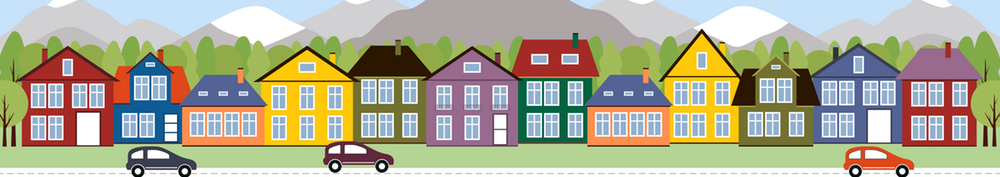

In [5]:
Image("C:/Users/admin/Desktop/1125/housesbanner.png") 

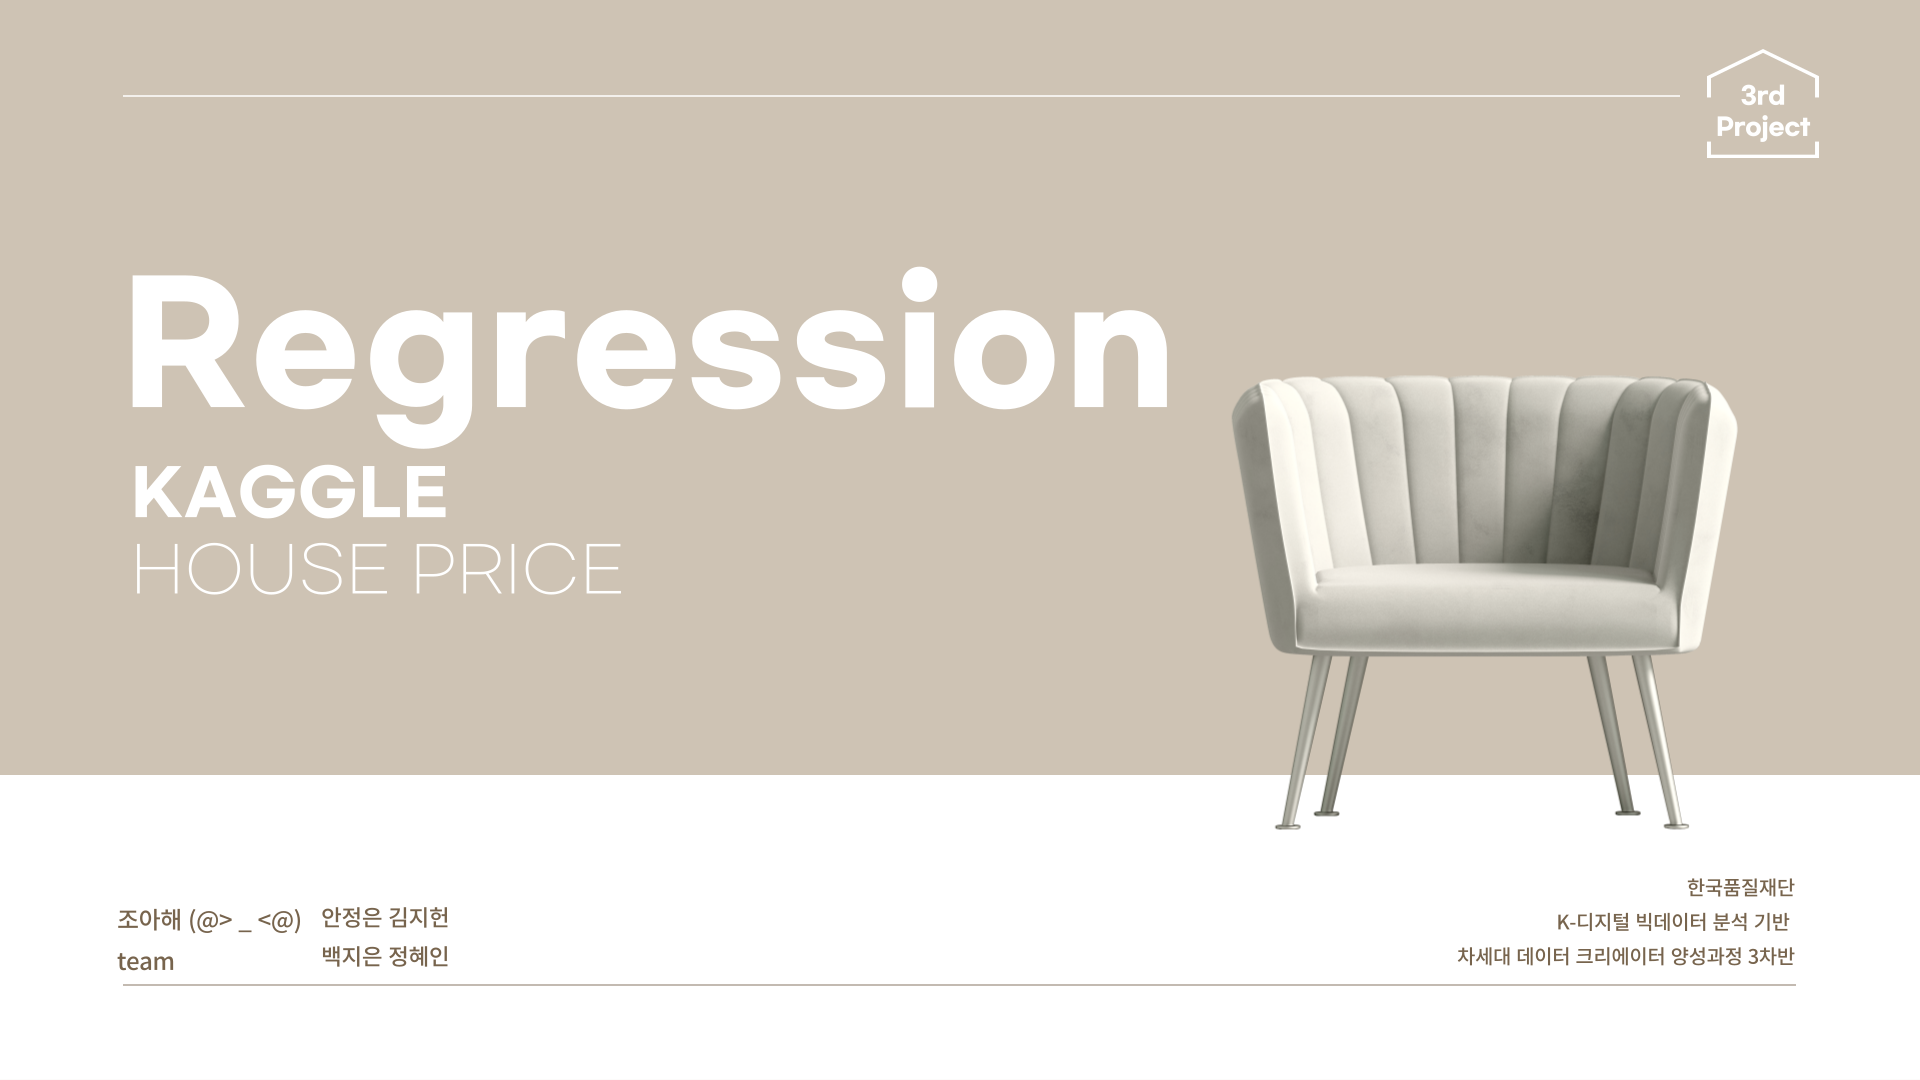

In [6]:
Image("C:/Users/admin/Desktop/1125/001.png") 

# 필요 패키지 불러오기

In [7]:
import numpy as np# 넘파이, 수치해석용 파이썬 패키지
import pandas as pd #  파이썬에서 표 형태의 데이터를 탐색하고 분석하는데 사용하는 라이브러리
import io #웹정보를 제공하는 정해진 알고리즘으로 불러와 사용자에게 필요한 정보로 변환

import matplotlib as mpl # 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import matplotlib.pyplot as plt # MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

%matplotlib inline


import warnings
warnings.filterwarnings('ignore') #오류창 안뜨게하기 위해서

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

In [8]:
%matplotlib inline 
# Notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%config InlineBackend.figure_format = 'retina' 
#높은 해상도의 그래프 출력

In [9]:
mpl.rc('font', family = 'malgun_gothic') # 글자체 고딕
mpl.rc('axes', unicode_minus=False) # 유니코드 마이너스 오류 안뜨게

머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리

In [19]:
from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from scipy import stats
from scipy.stats import norm
# import statsmodels.api as sm

# 기계학습 모델 구축 및 평가 패키지
# import scipy as sp
# from scipy.stats import norm, skew

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [20]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from catboost import CatBoostRegressor

In [ ]:
# Image("파일경로/파일명.확장자명") 

In [ ]:
# # 지드라이브와 연결
# from google.colab import drive
# drive.mount("/content/gdrive")

Mounted at /content/gdrive


# 데이터 불러오기

In [13]:
house_train_org = pd.read_csv('C:/Users/admin/Desktop/data/train.csv')
house_test = pd.read_csv('C:/Users/admin/Desktop/data/test.csv')
house_train = house_train_org.copy() #원본을 유지하기 위해 
house_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

# 데이터 탐색 및 시각화

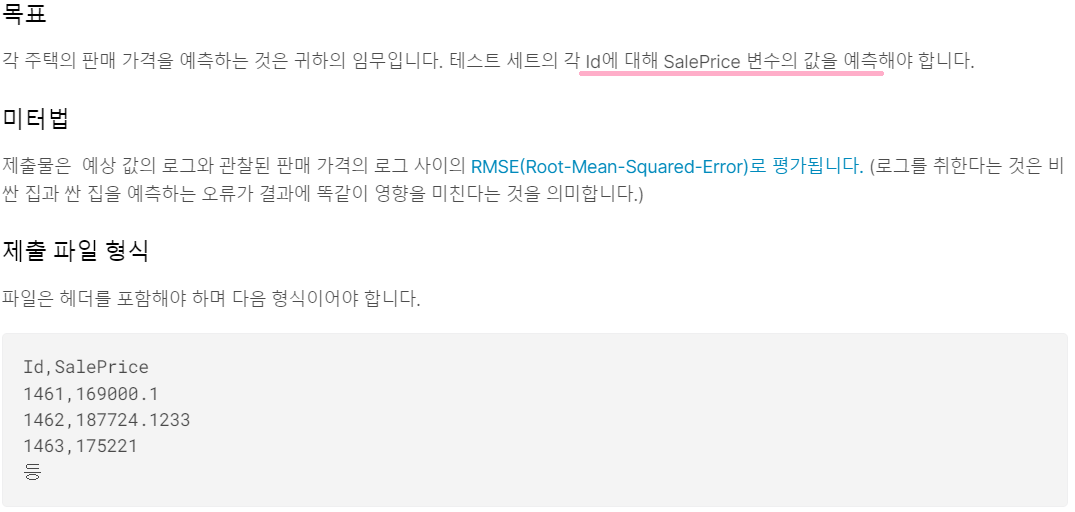

In [14]:
Image("C:/Users/admin/Desktop/1125/01.png") 

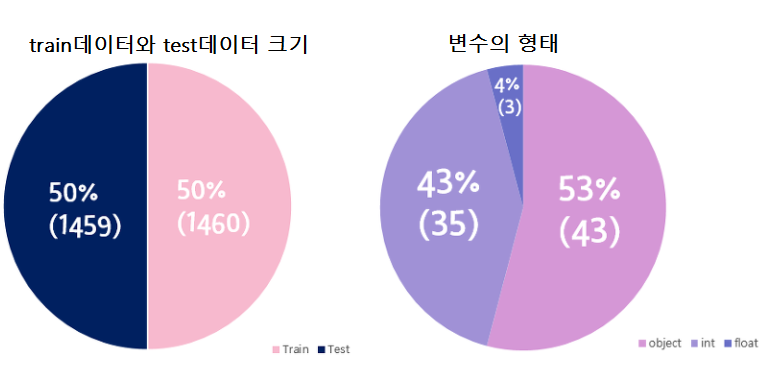

In [15]:
Image("C:/Users/admin/Desktop/1125/datatype.png") 

## target값(SalePrice)

### before scale

In [16]:
# SalePrice의 왜도(skewness)와 첨도(kurtosis) 확인
print("왜도: %f" % house_train['SalePrice'].skew())
print("첨도: %f" % house_train['SalePrice'].kurt())

왜도: 1.882876
첨도: 6.536282


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

findfont: Font family ['malgun_gothic'] not found. Falling back to DejaVu Sans.


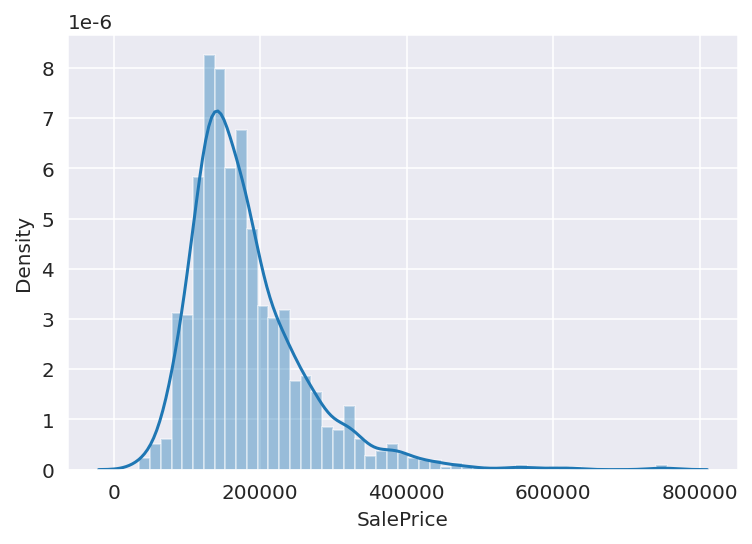

In [17]:
#histogram으로 target값의 분포도 확인
sns.distplot(house_train['SalePrice'])

findfont: Font family ['malgun_gothic'] not found. Falling back to DejaVu Sans.


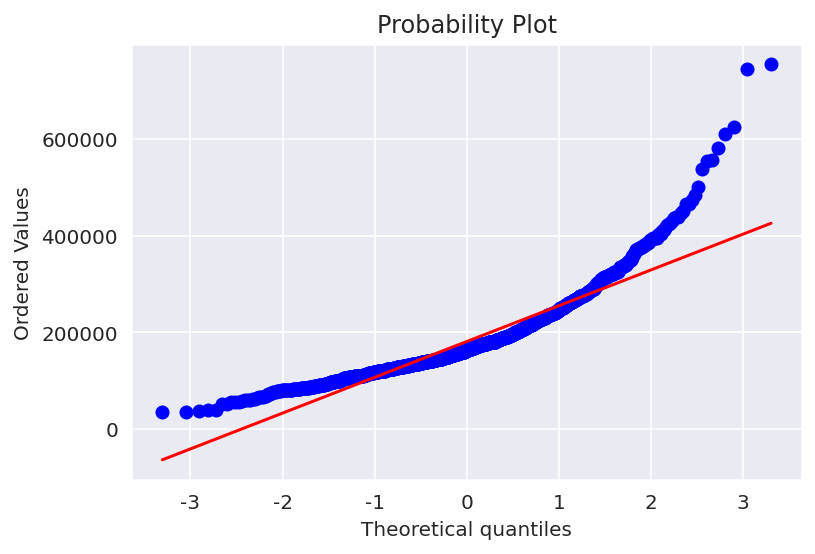

In [21]:
res = stats.probplot(house_train['SalePrice'], plot=plt)

### after scale

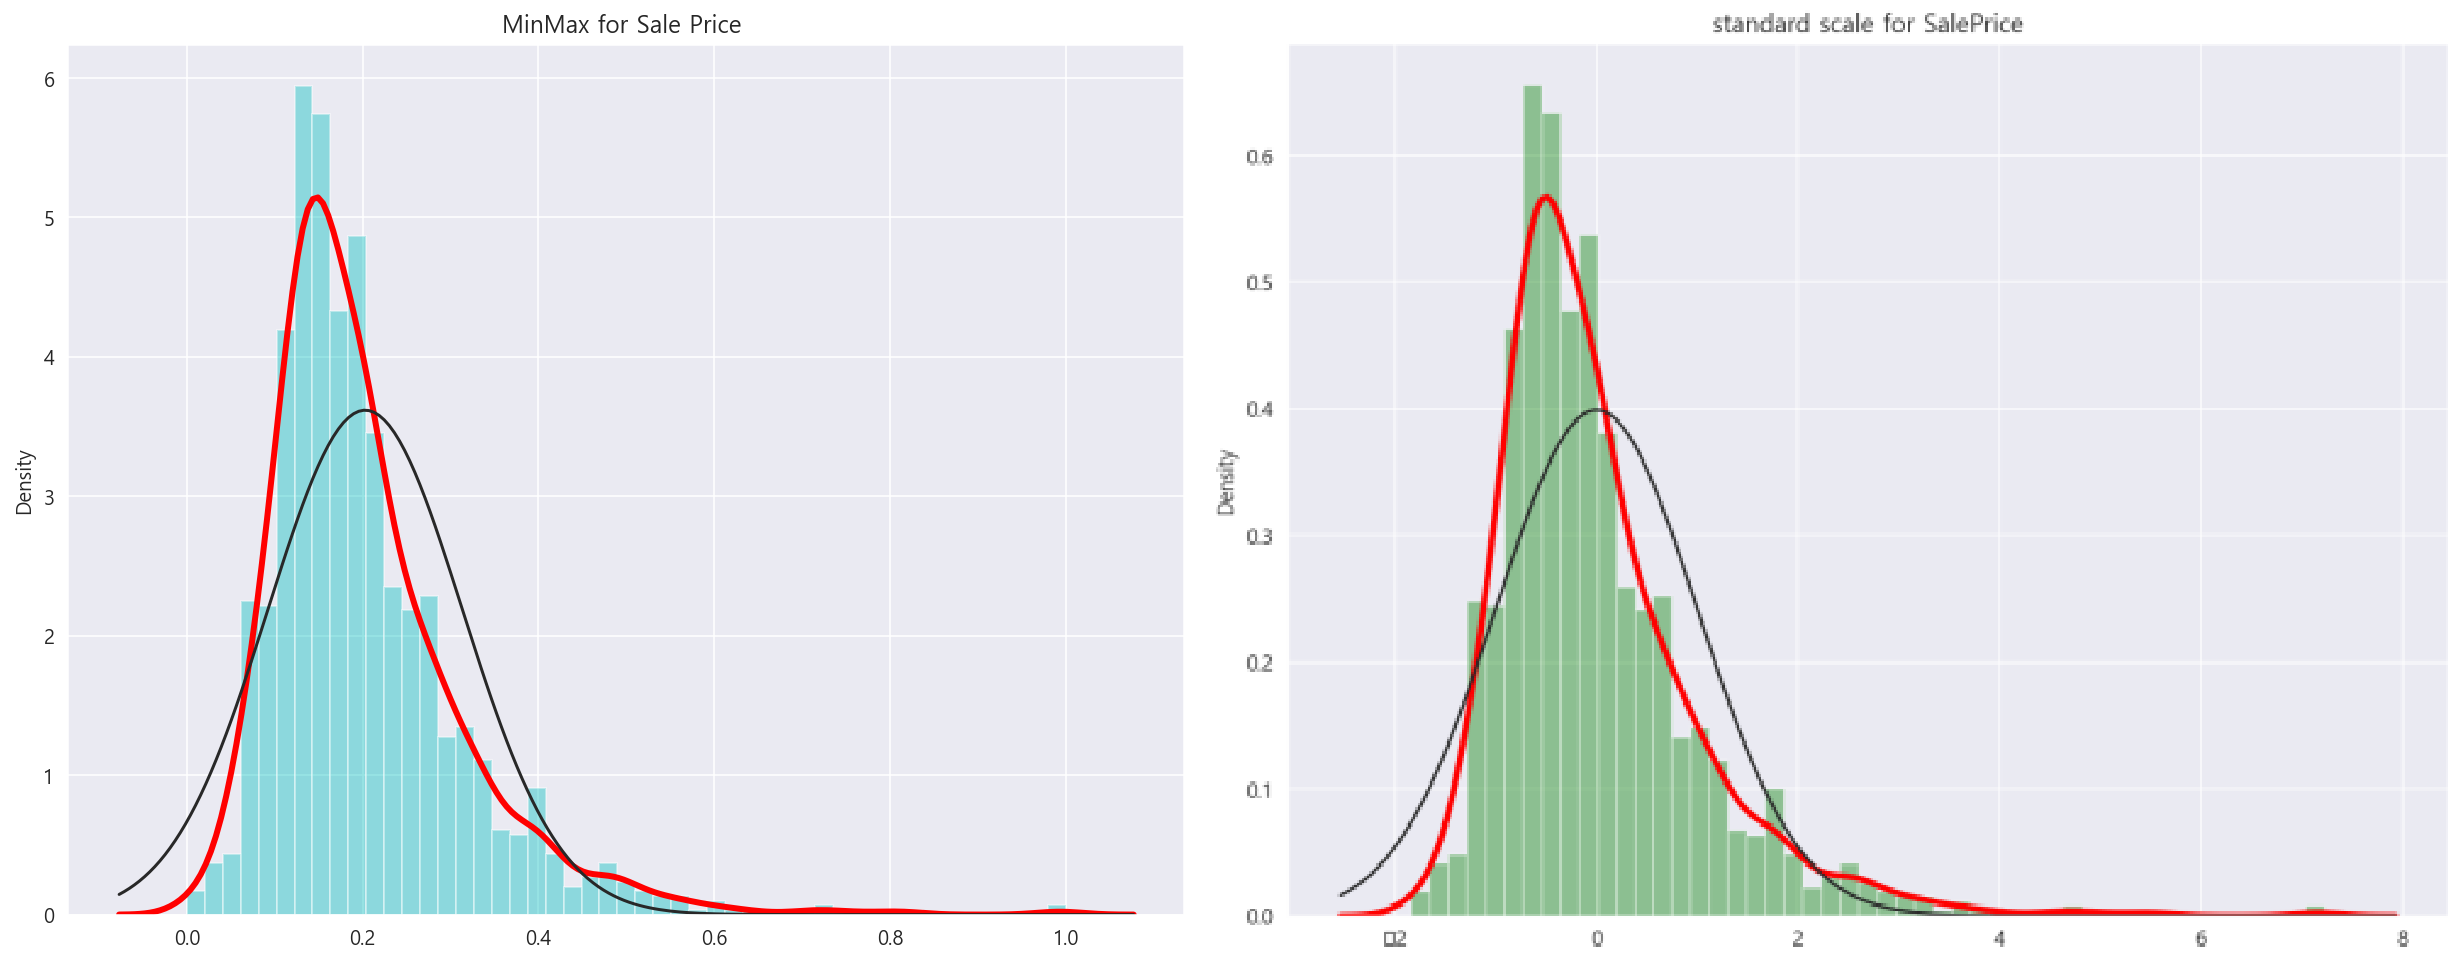

In [22]:
Image("C:/Users/admin/Desktop/1125/before saleprice scaled.png") 

#### log scale 선정 이유

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

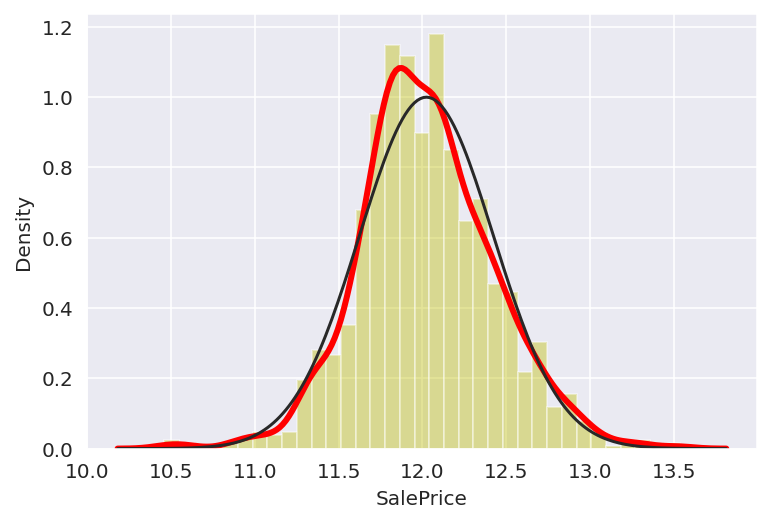

In [23]:
#target값의 정규성 보여주기
# SalePrice Log변환 후 정규분포도 확인을 통해서 제대로 됐는지 보자
house_train['SalePrice'] = np.log1p(house_train['SalePrice'])
sns.distplot(house_train['SalePrice'], fit=norm, color = 'y',  kde_kws={"color": "red", "lw": 3})

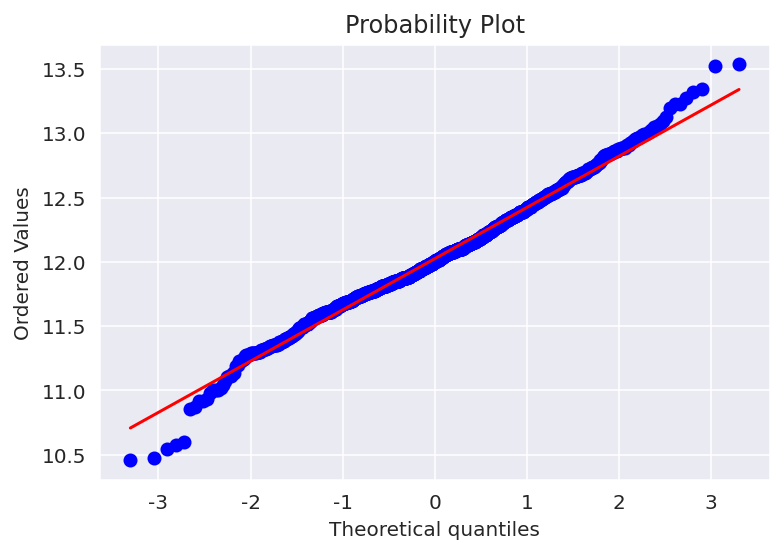

In [24]:
res = stats.probplot(house_train['SalePrice'], plot=plt)

In [25]:
# SalePrice의 왜도(skewness)와 첨도(kurtosis) 확인
print("왜도: %f" % house_train['SalePrice'].skew())
print("첨도: %f" % house_train['SalePrice'].kurt())

왜도: 0.121347
첨도: 0.809519


왜도가 0.043193 줄어들었다.

- 왜도(skewness)는 분포의 비대칭도를 나타내는 통계량이다. 정규분포, T분포와 같이 대칭인 분포의 경우 왜도가 0이다. 
<br><br>
- 첨도(kurtosis)는 분포의 꼬리부분의 길이와 중앙부분의 뾰족함에 대한 정보를 제공하는 통계량이다. 잘 정제된 통계량이 아니기 때문에 여전히 해석에 논란의 여지가 있다.
<br><br>
정규분포의 첨도는 0이다(기본적인 정의에 의하면 3이지만, 일반적으로 정규분포의 첨도를 0으로 만들기 위해 3을 빼서 정의하는 경우가 많다. 정규분포가 0이 되게 정의하는 첨도를 excess kurtosis라고 한다). 정규분포 처럼 첨도가 0인 경우를 Mesokurtic라고 한다.
<br><br>
첨도가 0보다 크면 정규분포보다 긴 꼬리를 갖고, 분포가 보다 중앙부분에 덜 집중되게 되므로 중앙부분이 뾰족한 모양을 가지게 된다. T분포는 정규분포보다 더 긴 꼬리를 가지므로 첨도가 0보다 크다. 첨도가 0보다 큰 경우를 Leptokurtic이라고 한다.
<br><br>
첨도가 0보다 작으면, 정규분포보다 짧은 꼬리를 갖고 분포가 중앙부분에 더 집중되어 중앙부분이 보다 완만한 모양을 가지게 된다

## target값과 관련된 상관성 확인하기

In [26]:
#SalePrice와 관련 된 상관계수 구하기 
house_train.corrwith(house_train['SalePrice'])

Id              -0.017942
MSSubClass      -0.073959
LotFrontage      0.355879
LotArea          0.257320
OverallQual      0.817185
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209043
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
GarageYrBlt      0.541073
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057330
YrSold          -0.037263
SalePrice        1.000000
dtype: float

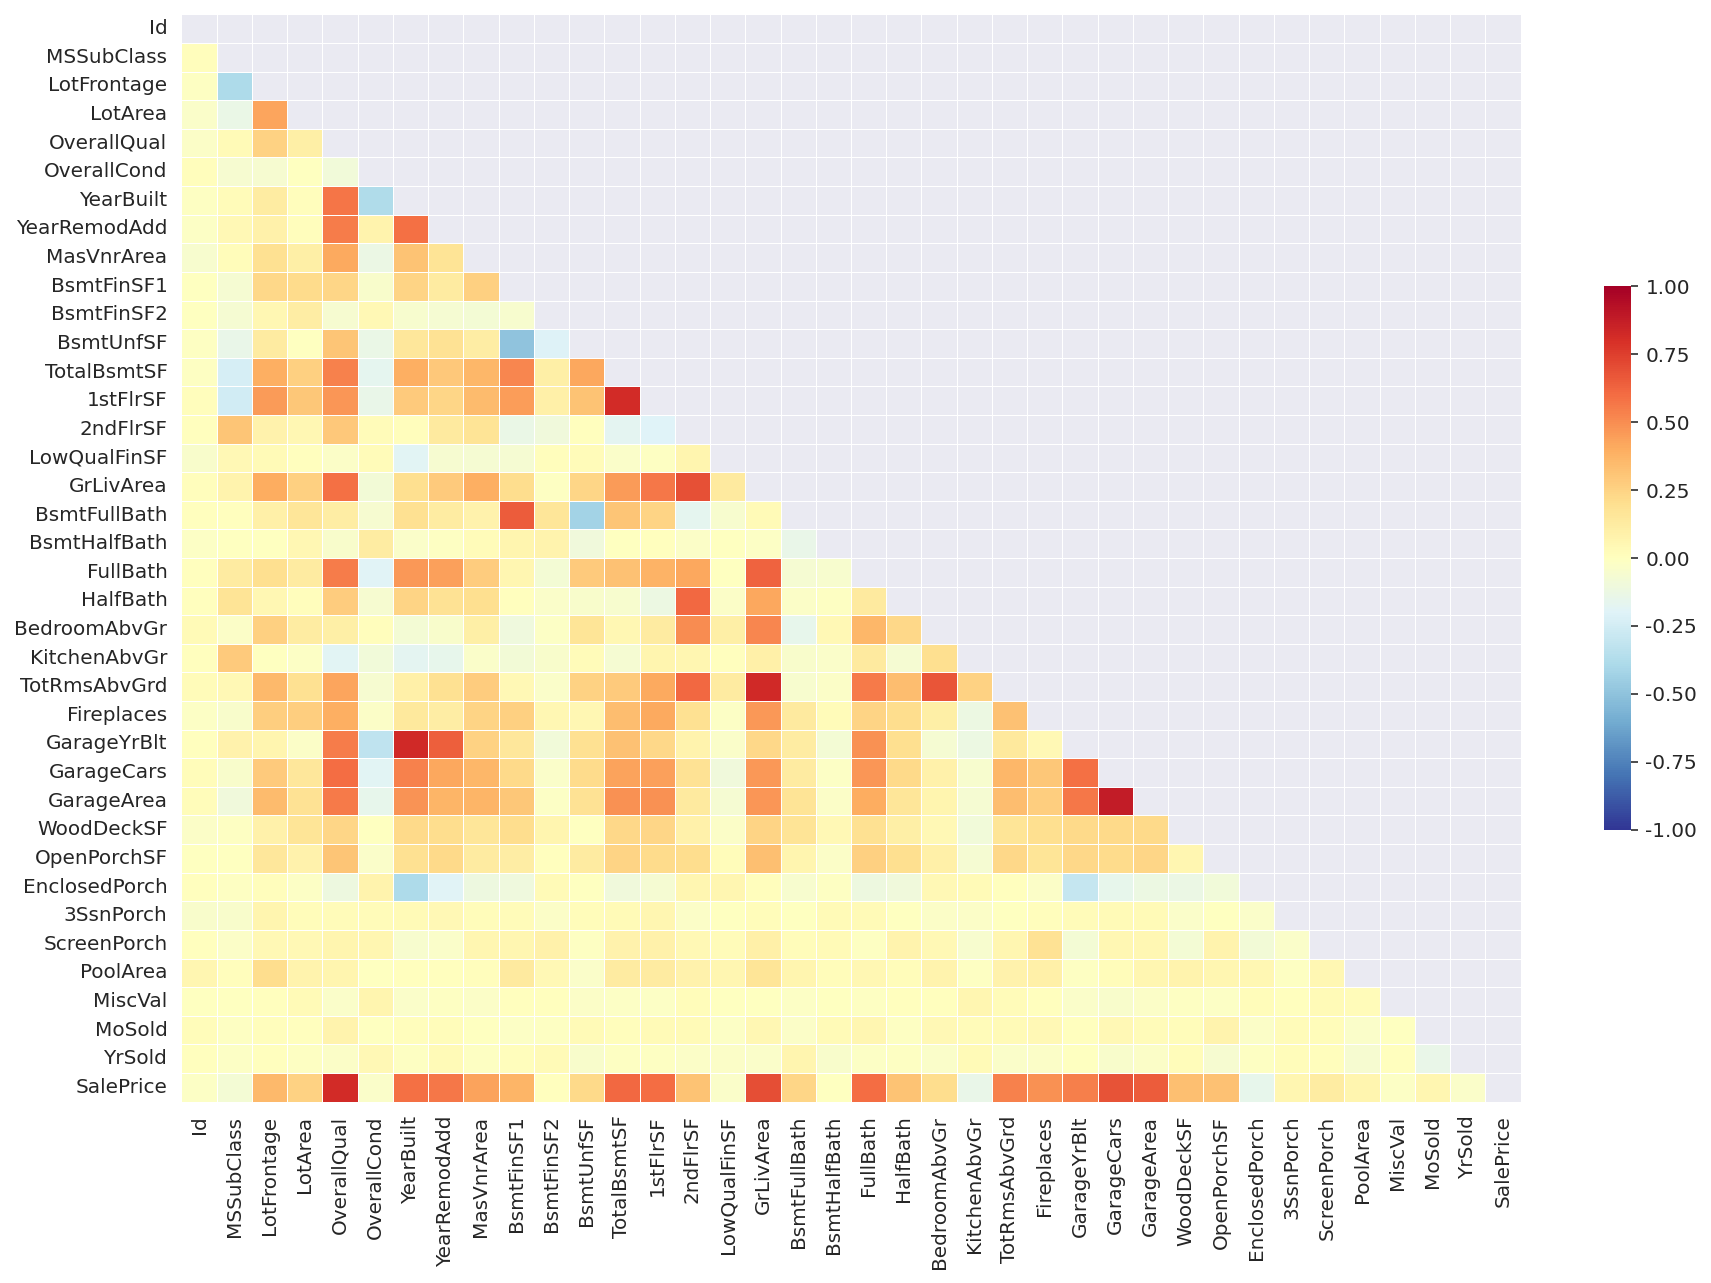

In [27]:
df = house_train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df,
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

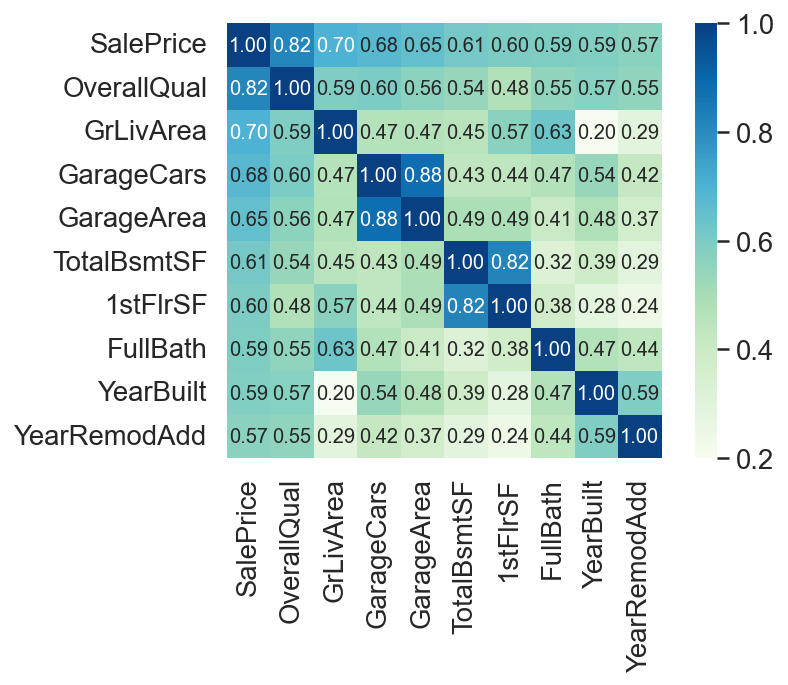

In [28]:
# 모든 피처를 다 시각화하니 보기가 어려워서 
# SalePrice와의 상관관계만 히트맵으로 보자

corrmat = house_train.corr()

k = 10  # 관련성이 높은 10가지만 보기
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='GnBu',
                 square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

데이터에 따르면, 'OverallQuality', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt' 같은 변수가 관련이 높아 보인다.
<br>
최대한 효율적으로 탐색하기 위해 관련이 높을 것 같은 카테고리를 먼저 주의 깊게 살펴본 후, 전체적인 데이터에 집중할 계획이다.

In [29]:
# 상관관계가 0.3 이상인 것만 보기로 하여 골라내는 작업
cor = house_train.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_fe

#상관관계가 어느 정도 있다는 것을 알려면, 0.3~05 어느정도의 양의 상관관계가 있다. 0.5~강한 양의 상관관계가 있다.고 보기에 0
#3이상으로 관계가 있는 column들만 들고 온다.

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

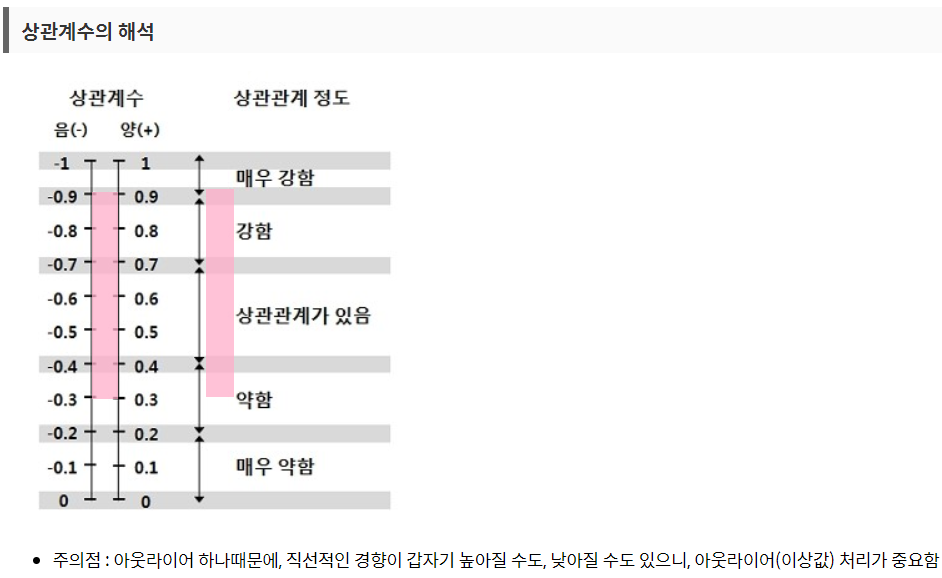

In [30]:
Image("C:/Users/admin/Desktop/1125/corr.png") 

### 관련성이 높은 변수들만 산점도 확인

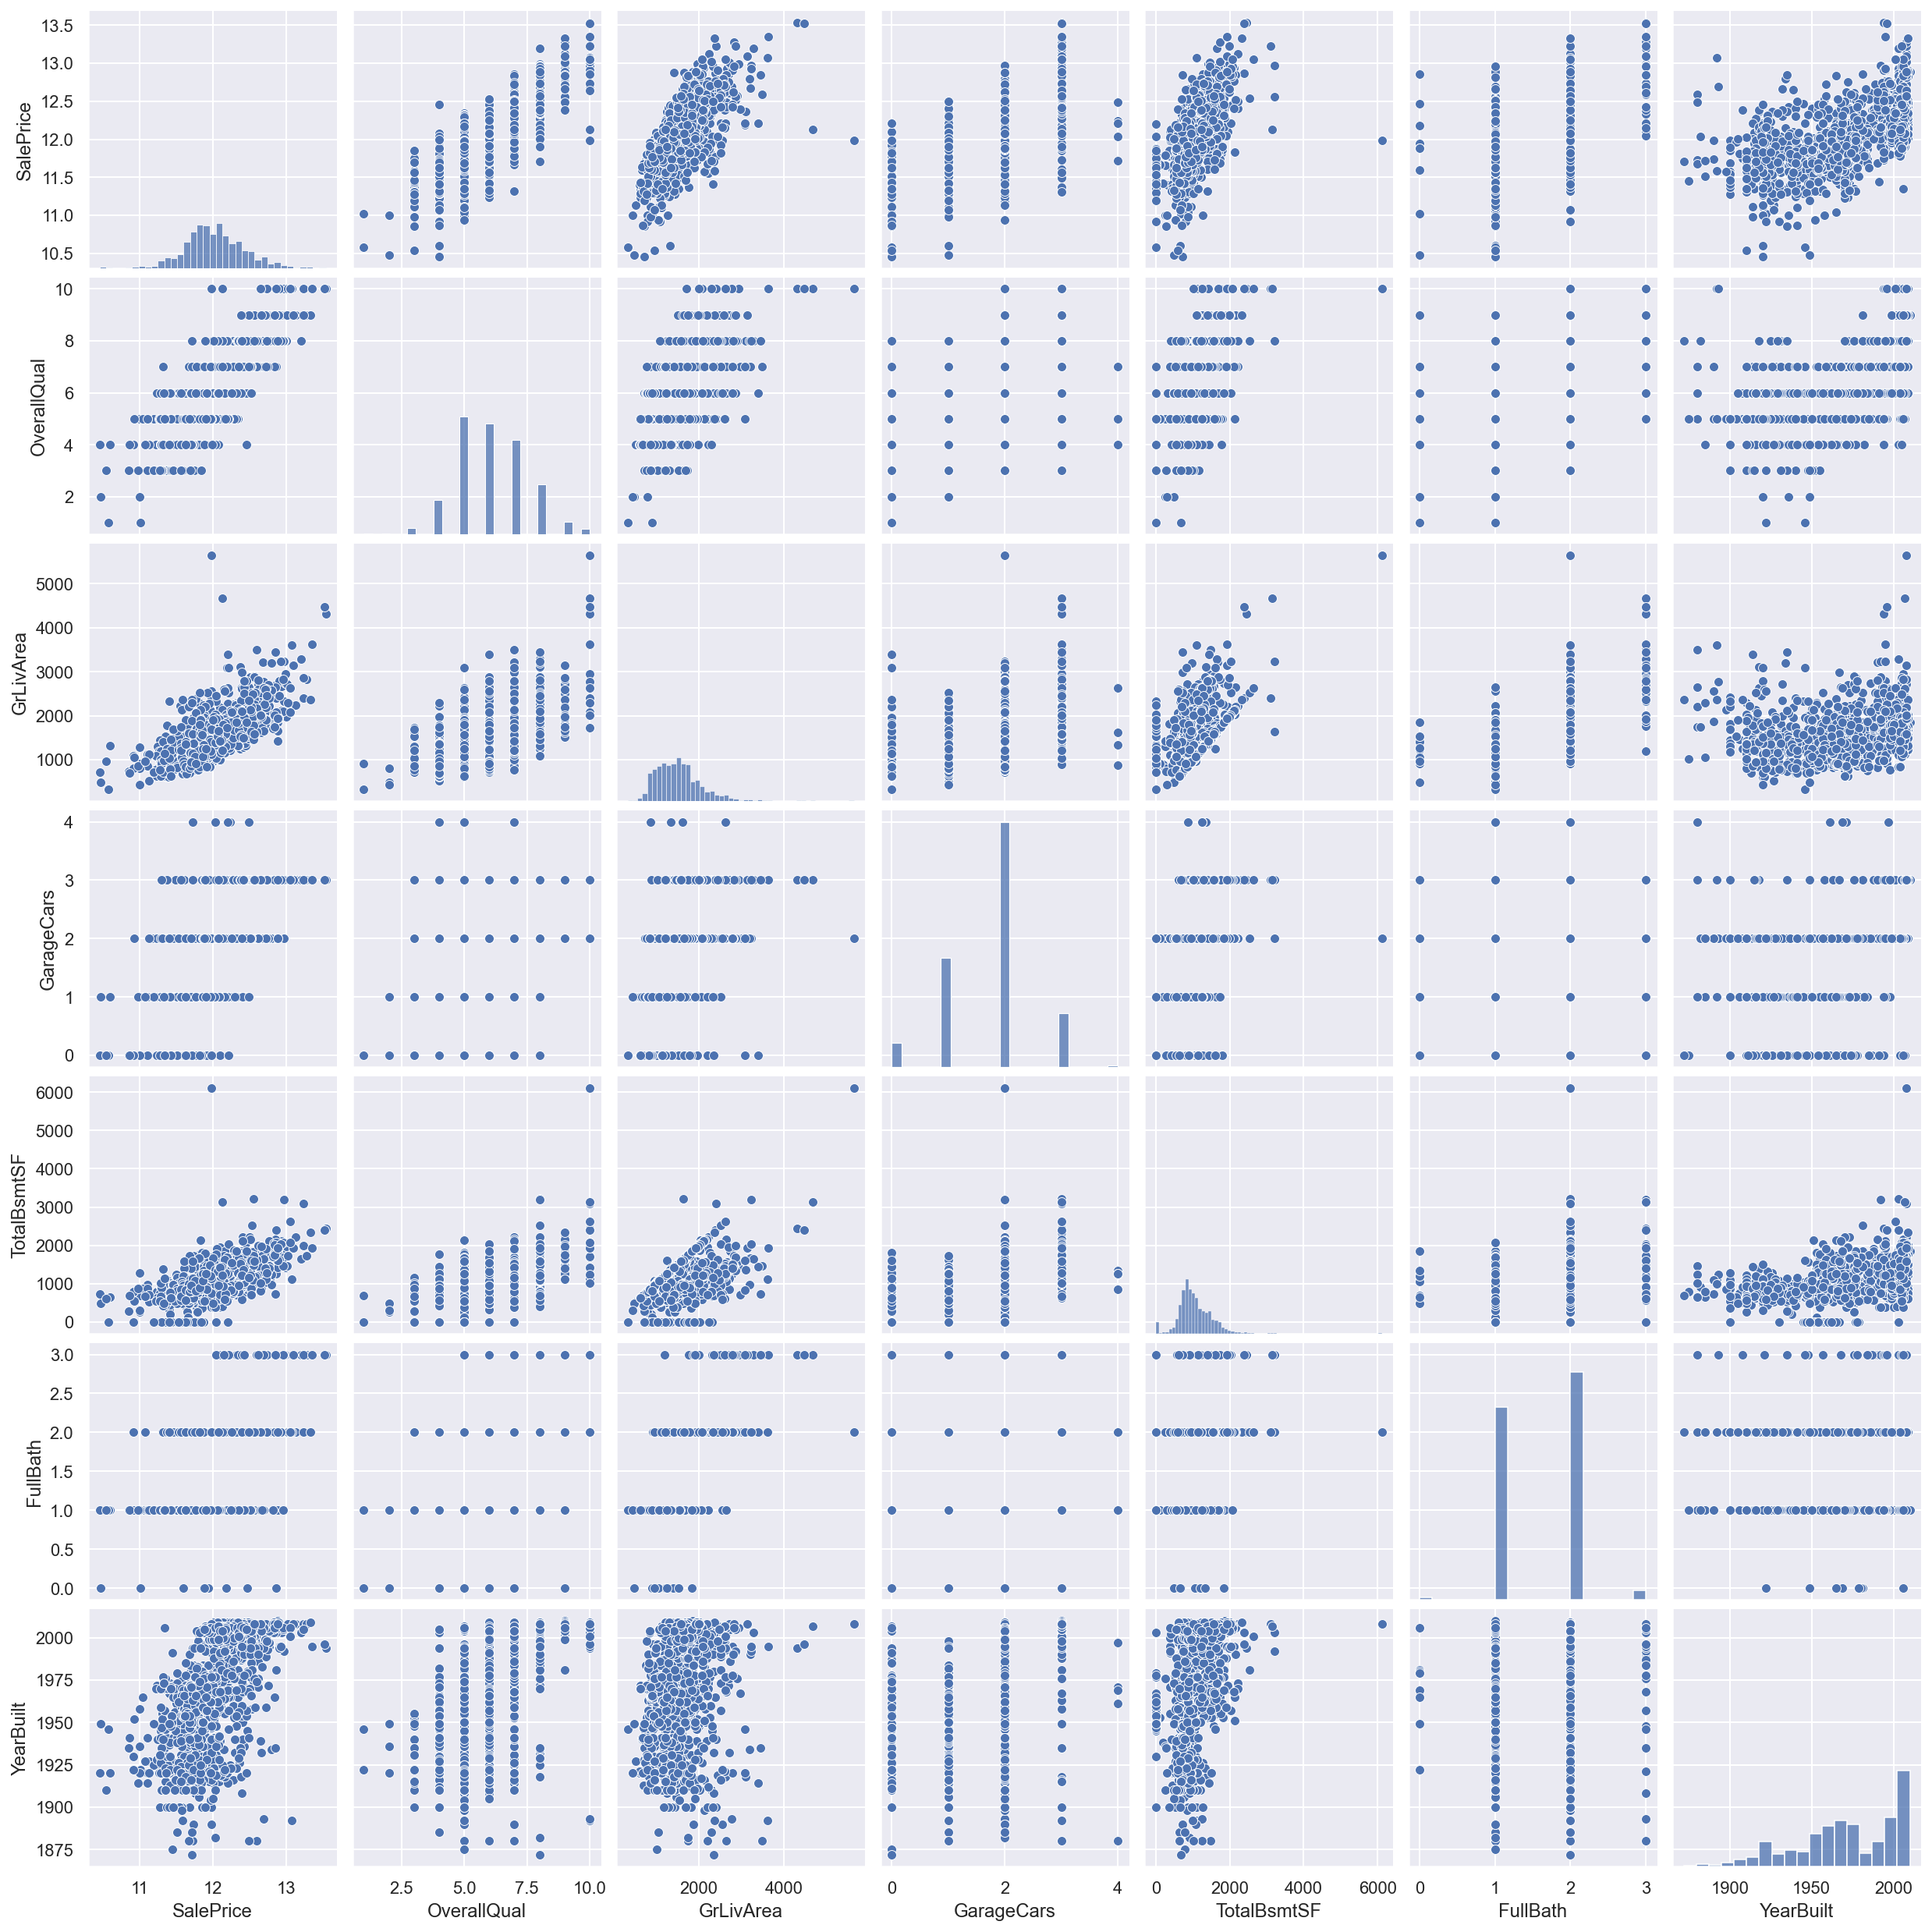

In [31]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_train[cols], size = 2.5)
plt.show()

- 산점도를 통해 얻어낸 insight!<br><br><br>
- 'TotalBsmtSF'와 'GrLiveArea'의 상관성을 보면 점들이 거의 경계선처럼 그려져있다. 
- TotalBsmtSF: 지하 면적의 총 평방피트
- GrLivArea: 지상(지상) 거실 면적 평방피트<br> 
인것을 감안하면 지상공간보다 큰 지하공간은 (벙커를 사지않는한) 불가능하다는 점에서 해석할 수 있다.<br>

<br><br><br><br><br><br><br>
왜! 다중공선성을 확인하지 않았는가? <br><br>
최종으로 돌렸을 때 column을 날렸을 때
<br>
column들을 다 가져갔을 때 보다 최종 점수가 내려갔기 때문이다
<br><br>
또한, 관련있어보이는 것은 data description을 보며 컬럼들을 정리해주었다.

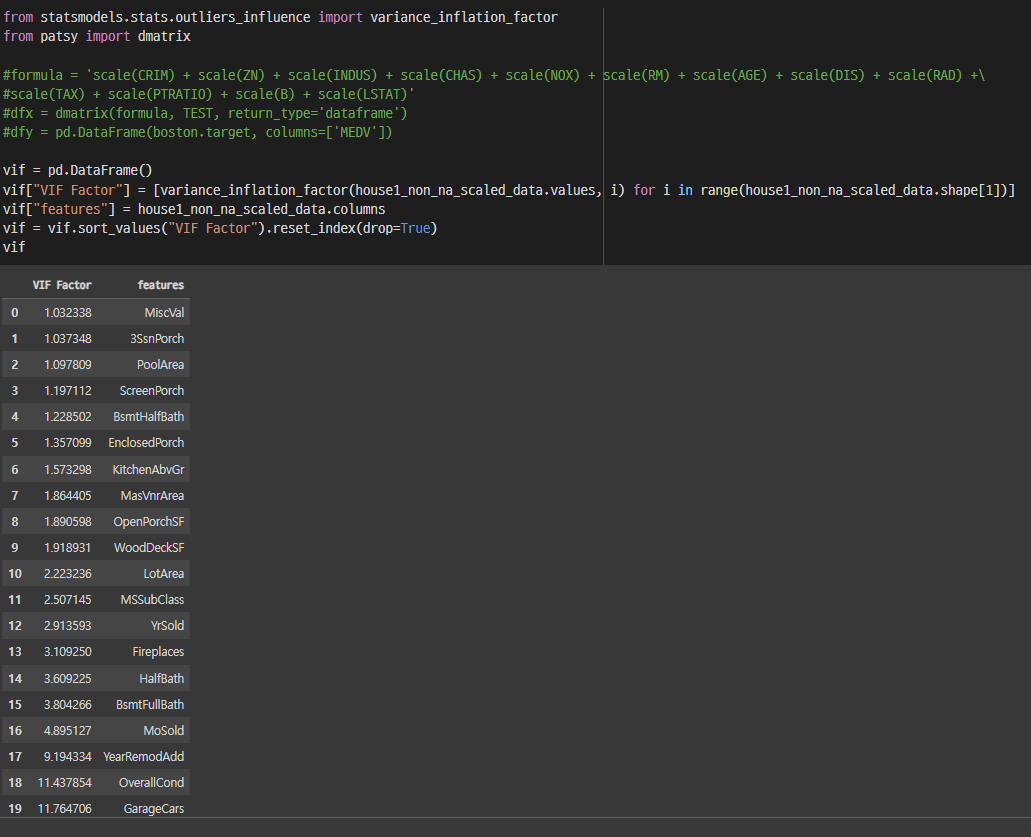

In [32]:
Image("C:/Users/admin/Desktop/1125/vif.png") 

## target값 外 변수들 확인

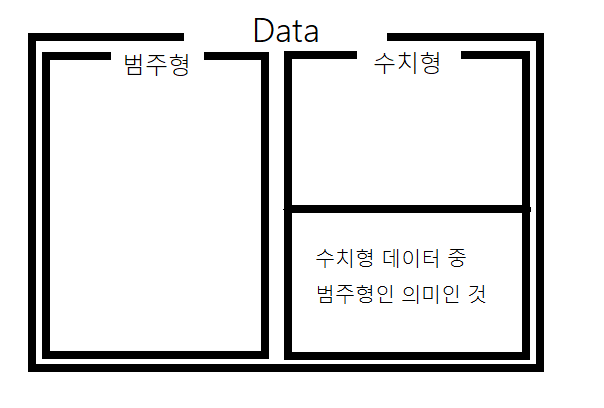

In [33]:
Image("C:/Users/admin/Desktop/1125/datasettype.png") 

In [34]:
numerical_feats = house_train.dtypes[house_train.dtypes != "object"].index
print(house_train[numerical_feats].columns)
print("수치형 데이터 수: ", len(numerical_feats))
print('-'*100)
categorical_feats = house_train.dtypes[house_train.dtypes == "object"].index
print(house_train[categorical_feats].columns)
print("범주형 데이터 수: ", len(categorical_feats))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
수치형 데이터 수:  38
----------------------------------------------------------------------------------------------------
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCon

## 이상치 시각화

In [36]:
# 데이터 다시 불러오기기
house_train_org = pd.read_csv('C:/Users/admin/Desktop/data/train.csv')
house_test = pd.read_csv('C:/Users/admin/Desktop/data/test.csv')
house_train = house_train_org.copy() #원본을 유지하기 위해 
house_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

- int type의 범주형들의 형태를 바꾸기

In [37]:
# int 타입의 범주형들의 형태를 바꾸어 줍니다.
# 아래는 수치형 데이터이지만 범주형 데이터였기에 문자형으로 바꿔주는 작업을 하였으나 연도 같은 경우 비어 있는 연도도 있어서 원핫이나 라벨 인코딩이 애매해서 그대로 둠둠

# house_train_scatter_color['FullBath'] = house_train_scatter_color['FullBath'].astype(str)
# house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)
# house_train_scatter_color['GarageCars'] = house_train_scatter_color['GarageCars'].astype(str)
# house_train_scatter_color['Fireplaces'] = house_train_scatter_color['Fireplaces'].astype(str)
# house_train_scatter_color['TotRmsAbvGrd'] = house_train_scatter_color['TotRmsAbvGrd'].astype(str)
# house_train_scatter_color['KitchenAbvGr'] = house_train_scatter_color['KitchenAbvGr'].astype(str)
# house_train_scatter_color['BedroomAbvGr'] = house_train_scatter_color['BedroomAbvGr'].astype(str)
# house_train_scatter_color['HalfBath'] = house_train_scatter_color['HalfBath'].astype(str)
# house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
# house_train_scatter_color['BsmtHalfBath'] = house_train_scatter_color['BsmtHalfBath'].astype(str)
# house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
# house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)
# house_train_scatter_color['GarageYrBlt'] = house_train_scatter_color['GarageYrBlt'].astype(str)
# house_train_scatter_color['YearRemodAdd'] = house_train_scatter_color['YearRemodAdd'].astype(str)
# house_train_scatter_color['YearBuilt'] = house_train_scatter_color['YearBuilt'].astype(str)
# house_train_scatter_color['OverallQual'] = house_train_scatter_color['OverallQual'].astype(str)
house_train['MSSubClass'] = house_train['MSSubClass'].astype(str)
# house_train_scatter_color['OverallCond'] = house_train_scatter_color['OverallCond'].astype(str)
# house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)

In [38]:
# train 데이터를 원본, 원본에 로그 변환된 데이터, 그리고 로그변환된 데이터로 스탠다드 스케일을한 데이터 3가지를 얻기위해 원본 데이터를 얕은 복사로 불러옴옴

house_train_outlier = house_train.copy()
house_train_non_scale = house_train.copy()

In [39]:
# Id를 제외한한 수치형 데이터를 불러옴
house_train_outlier = house_train_outlier[house_train_outlier.dtypes[house_train_outlier.dtypes != object].index].drop('Id', axis = 1)

In [40]:
# Id를 제외한한 수치형 데이터를 불러옴
house_train_non_scale = house_train_non_scale[house_train_non_scale.dtypes[house_train_non_scale.dtypes != object].index].drop('Id', axis = 1)

In [41]:
# 추후 스탠다드 스케일한 넘파이 형태의 데이터를 판다스의 데이터 프레임 형태로 변환하고 다시 컬럼명을 주기 위해 저장장
house_train_outlier_colimns = list(house_train_outlier.columns)

In [42]:
# 로그 변환을 위해 왜도가 높은 컬럼명과 그 정도를 확인한다다
from scipy.stats import skew 
skew_features = house_train_outlier.apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [43]:
# 로그 변환 수행
house_train_outlier[skew_features_top.index] = np.log1p(house_train_outlier[skew_features_top.index])

In [44]:
# 로그 변환 후 왜도 변화 확인
# 일부는 왜도가 극심해서 변환 후에도 남아 있다.
skew_features1 = house_train_outlier.apply(lambda x : skew(x))
skew_features_top1 = skew_features1[skew_features1 > 1]
print(skew_features_top1.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


In [45]:
# 스탠다드 스케일 수행
# scaled_ss_data 변수명에 담았다

from sklearn.preprocessing import StandardScaler
scaled_ss_data = StandardScaler().fit_transform(house_train_outlier)
scaled_ss_data = pd.DataFrame(scaled_ss_data)
scaled_ss_data.columns = house_train_outlier_colimns
scaled_ss_data

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.208034 -0.133270     0.651479    -0.517200   1.050994   
1        0.409895  0.113413    -0.071836     2.179628   0.156734   
2       -0.084449  0.420049     0.651479    -0.517200   0.984752   
3       -0.414011  0.103317     0.651479    -0.517200  -1.863632   
4        0.574676  0.878431     1.374795    -0.517200   0.951632   
...           ...       ...          ...          ...        ...   
1455    -0.331620 -0.259231    -0.071836    -0.517200   0.918511   
1456     0.615871  0.725429    -0.071836     0.381743   0.222975   
1457    -0.166839 -0.002359     0.651479     3.078570  -1.002492   
1458    -0.084449  0.136833    -0.795151     0.381743  -0.704406   
1459     0.203918  0.180116    -0.795151     0.381743  -0.207594   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0         0.878668    0.510015    0.779431   -0.355342  -0.944591  ...   
1        -0.429577   -0.572835    0.888257   -0.355342  -0.641228  ...   
2         0.830215    0.322174    0.654803   -0.355342  -0.301643  ...   
3        -0.720298   -0.572835    0.384539   -0.355342  -0.061670  ...   
4         0.733308    1.360826    0.754400   -0.355342  -0.174865  ...   
...            ...         ...         ...         ...        ...  ...   
1455      0.733308   -0.572835   -1.414140   -0.355342   0.873321  ...   
1456      0.151865    0.084610    0.816966    2.409693   0.049262  ...   
1457      1.024029   -0.572835    0.464947   -0.355342   0.701265  ...   
1458      0.539493   -0.572835   -0.106220    3.405917  -1.284176  ...   
1459     -0.962566   -0.572835    0.833459    2.720609  -0.976285  ...   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0      -0.946701     0.845209      -0.404244  -0.128521    -0.292769   
1       1.249540    -1.072916      -0.404244  -0.128521    -0.292769   
2      -0.946701     0.675137      -0.404244  -0.128521    -0.292769   
3      -0.946701     0.592558       2.844374  -0.128521    -0.292769   
4       1.080884     0.991848      -0.404244  -0.128521    -0.292769   
...          ...          ...            ...        ...          ...   
1455   -0.946701     0.653002      -0.404244  -0.128521    -0.292769   
1456    1.310217    -1.072916      -0.404244  -0.128521    -0.292769   
1457   -0.946701     0.837652      -0.404244  -0.128521    -0.292769   
1458    1.328490    -1.072916       2.333532  -0.128521    -0.292769   
1459    1.597114     0.894925      -0.404244  -0.128521    -0.292769   

      PoolArea   MiscVal    MoSold    YrSold  SalePrice  
0    -0.069393 -0.190481 -1.599111  0.138777   0.560067  
1    -0.069393 -0.190481 -0.489110 -0.614439   0.212763  
2    -0.069393 -0.190481  0.990891  0.138777   0.734046  
3    -0.069393 -0.190481 -1.599111 -1.367655  -0.437383  
4    -0.069393 -0.190481  2.100892  0.138777   1.014651  
...        ...       ...       ...       ...        ...  
1455 -0.069393 -0.190481  0.620891 -0.614439   0.121433  
1456 -0.069393 -0.190481 -1.599111  1.645210   0.578019  
1457 -0.069393  6.193644 -0.489110  1.645210   1.174709  
1458 -0.069393 -0.190481 -0.859110  1.645210  -0.399657  
1459 -0.069393 -0.190481 -0.119110  0.138777  -0.306695  

[1460 rows x 36 columns]

In [46]:
# 이상치를 산점도로 시각화 하기 위한 함수
# 입력 받은 데이터 프레임의 각 컬럼에서 np.percentile을 이용하여 1사분위수와 3사분위수를 구하고
# iqr을 구한다.
# 이후 max값 min값을 구한 뒤 max값을 초과하고 min값의 미만인 데이터의 인덱스를 구해 mask에 담는다
# 이상치를 시각화할 컬럼의 컬럼명에 _col이 붙은 새로운 컬럼을 생성하고
# mask에서 인덱스가 담긴 배열을 가지고 for문을 이용하여 이상치가 위치한 행에 red를 담는다.

def find_outlier(data):
    for i in data.columns:
        if data[i].dtype != object:
            q1, q3 = np.percentile(data[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            mask = np.where((data[i] > upper_bound) | (data[i]< lower_bound))
            a = i +'_col'
            data[a] = 'blue'
            for j in mask:
                data[a][j] = 'red'

In [47]:
# 함수 수행
find_outlier(house_train_outlier)

In [48]:
# 새로운 컬럼 생성 확인
house_train_outlier

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0            65.0  9.042040            7            5       2003   
1            80.0  9.169623            6            8       1976   
2            68.0  9.328212            7            5       2001   
3            60.0  9.164401            7            5       1915   
4            84.0  9.565284            8            5       2000   
...           ...       ...          ...          ...        ...   
1455         62.0  8.976894            6            5       1999   
1456         85.0  9.486152            6            6       1978   
1457         66.0  9.109746            7            9       1941   
1458         68.0  9.181735            5            6       1950   
1459         75.0  9.204121            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0             2003       196.0    6.561031    0.000000        150  ...   
1             1976         0.0    6.886532    0.000000        284  ...   
2             2002       162.0    6.188264    0.000000        434  ...   
3             1970         0.0    5.379897    0.000000        540  ...   
4             2000       350.0    6.486161    0.000000        490  ...   
...            ...         ...         ...         ...        ...  ...   
1455          2000         0.0    0.000000    0.000000        953  ...   
1456          1988       119.0    6.673298    5.099866        589  ...   
1457          2006         0.0    5.620401    0.000000        877  ...   
1458          1996         0.0    3.912023    6.937314          0  ...   
1459          1965         0.0    6.722630    5.673323        136  ...   

      WoodDeckSF_col  OpenPorchSF_col  EnclosedPorch_col  3SsnPorch_col  \
0               blue             blue               blue           blue   
1               blue             blue               blue           blue   
2               blue             blue               blue           blue   
3               blue             blue                red           blue   
4               blue             blue               blue           blue   
...              ...              ...                ...            ...   
1455            blue             blue               blue           blue   
1456            blue             blue               blue           blue   
1457            blue             blue               blue           blue   
1458            blue             blue                red           blue   
1459            blue             blue               blue           blue   

      ScreenPorch_col  PoolArea_col  MiscVal_col  MoSold_col  YrSold_col  \
0                blue          blue         blue        blue        blue   
1                blue          blue         blue        blue        blue   
2                blue          blue         blue        blue        blue   
3                blue          blue         blue        blue        blue   
4                blue          blue         blue        blue        blue   
...               ...           ...          ...         ...         ...   
1455             blue          blue         blue        blue        blue   
1456             blue          blue         blue        blue        blue   
1457             blue          blue          red        blue        blue   
1458             blue          blue         blue        blue        blue   
1459             blue          blue         blue        blue        blue   

      SalePrice_col  
0              blue  
1              blue  
2              blue  
3              blue  
4              blue  
...             ...  
1455           blue  
1456           blue  
1457           blue  
1458           blue  
1459           blue  

[1460 rows x 72 columns]

In [49]:
# 스탠다드 스케일된 데이터 프레임 역시 함수 수행
find_outlier(scaled_ss_data)

In [50]:
# 새로운 컬럼 생성 확인
scaled_ss_data

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.208034 -0.133270     0.651479    -0.517200   1.050994   
1        0.409895  0.113413    -0.071836     2.179628   0.156734   
2       -0.084449  0.420049     0.651479    -0.517200   0.984752   
3       -0.414011  0.103317     0.651479    -0.517200  -1.863632   
4        0.574676  0.878431     1.374795    -0.517200   0.951632   
...           ...       ...          ...          ...        ...   
1455    -0.331620 -0.259231    -0.071836    -0.517200   0.918511   
1456     0.615871  0.725429    -0.071836     0.381743   0.222975   
1457    -0.166839 -0.002359     0.651479     3.078570  -1.002492   
1458    -0.084449  0.136833    -0.795151     0.381743  -0.704406   
1459     0.203918  0.180116    -0.795151     0.381743  -0.207594   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0         0.878668    0.510015    0.779431   -0.355342  -0.944591  ...   
1        -0.429577   -0.572835    0.888257   -0.355342  -0.641228  ...   
2         0.830215    0.322174    0.654803   -0.355342  -0.301643  ...   
3        -0.720298   -0.572835    0.384539   -0.355342  -0.061670  ...   
4         0.733308    1.360826    0.754400   -0.355342  -0.174865  ...   
...            ...         ...         ...         ...        ...  ...   
1455      0.733308   -0.572835   -1.414140   -0.355342   0.873321  ...   
1456      0.151865    0.084610    0.816966    2.409693   0.049262  ...   
1457      1.024029   -0.572835    0.464947   -0.355342   0.701265  ...   
1458      0.539493   -0.572835   -0.106220    3.405917  -1.284176  ...   
1459     -0.962566   -0.572835    0.833459    2.720609  -0.976285  ...   

      WoodDeckSF_col  OpenPorchSF_col  EnclosedPorch_col  3SsnPorch_col  \
0               blue             blue               blue           blue   
1               blue             blue               blue           blue   
2               blue             blue               blue           blue   
3               blue             blue                red           blue   
4               blue             blue               blue           blue   
...              ...              ...                ...            ...   
1455            blue             blue               blue           blue   
1456            blue             blue               blue           blue   
1457            blue             blue               blue           blue   
1458            blue             blue                red           blue   
1459            blue             blue               blue           blue   

      ScreenPorch_col  PoolArea_col  MiscVal_col  MoSold_col  YrSold_col  \
0                blue          blue         blue        blue        blue   
1                blue          blue         blue        blue        blue   
2                blue          blue         blue        blue        blue   
3                blue          blue         blue        blue        blue   
4                blue          blue         blue        blue        blue   
...               ...           ...          ...         ...         ...   
1455             blue          blue         blue        blue        blue   
1456             blue          blue         blue        blue        blue   
1457             blue          blue          red        blue        blue   
1458             blue          blue         blue        blue        blue   
1459             blue          blue         blue        blue        blue   

      SalePrice_col  
0              blue  
1              blue  
2              blue  
3              blue  
4              blue  
...             ...  
1455           blue  
1456           blue  
1457           blue  
1458           blue  
1459           blue  

[1460 rows x 72 columns]

In [51]:
# 스케일 하지 않은 데이터 프레임 역시 함수를 돌려본다
find_outlier(house_train_non_scale)

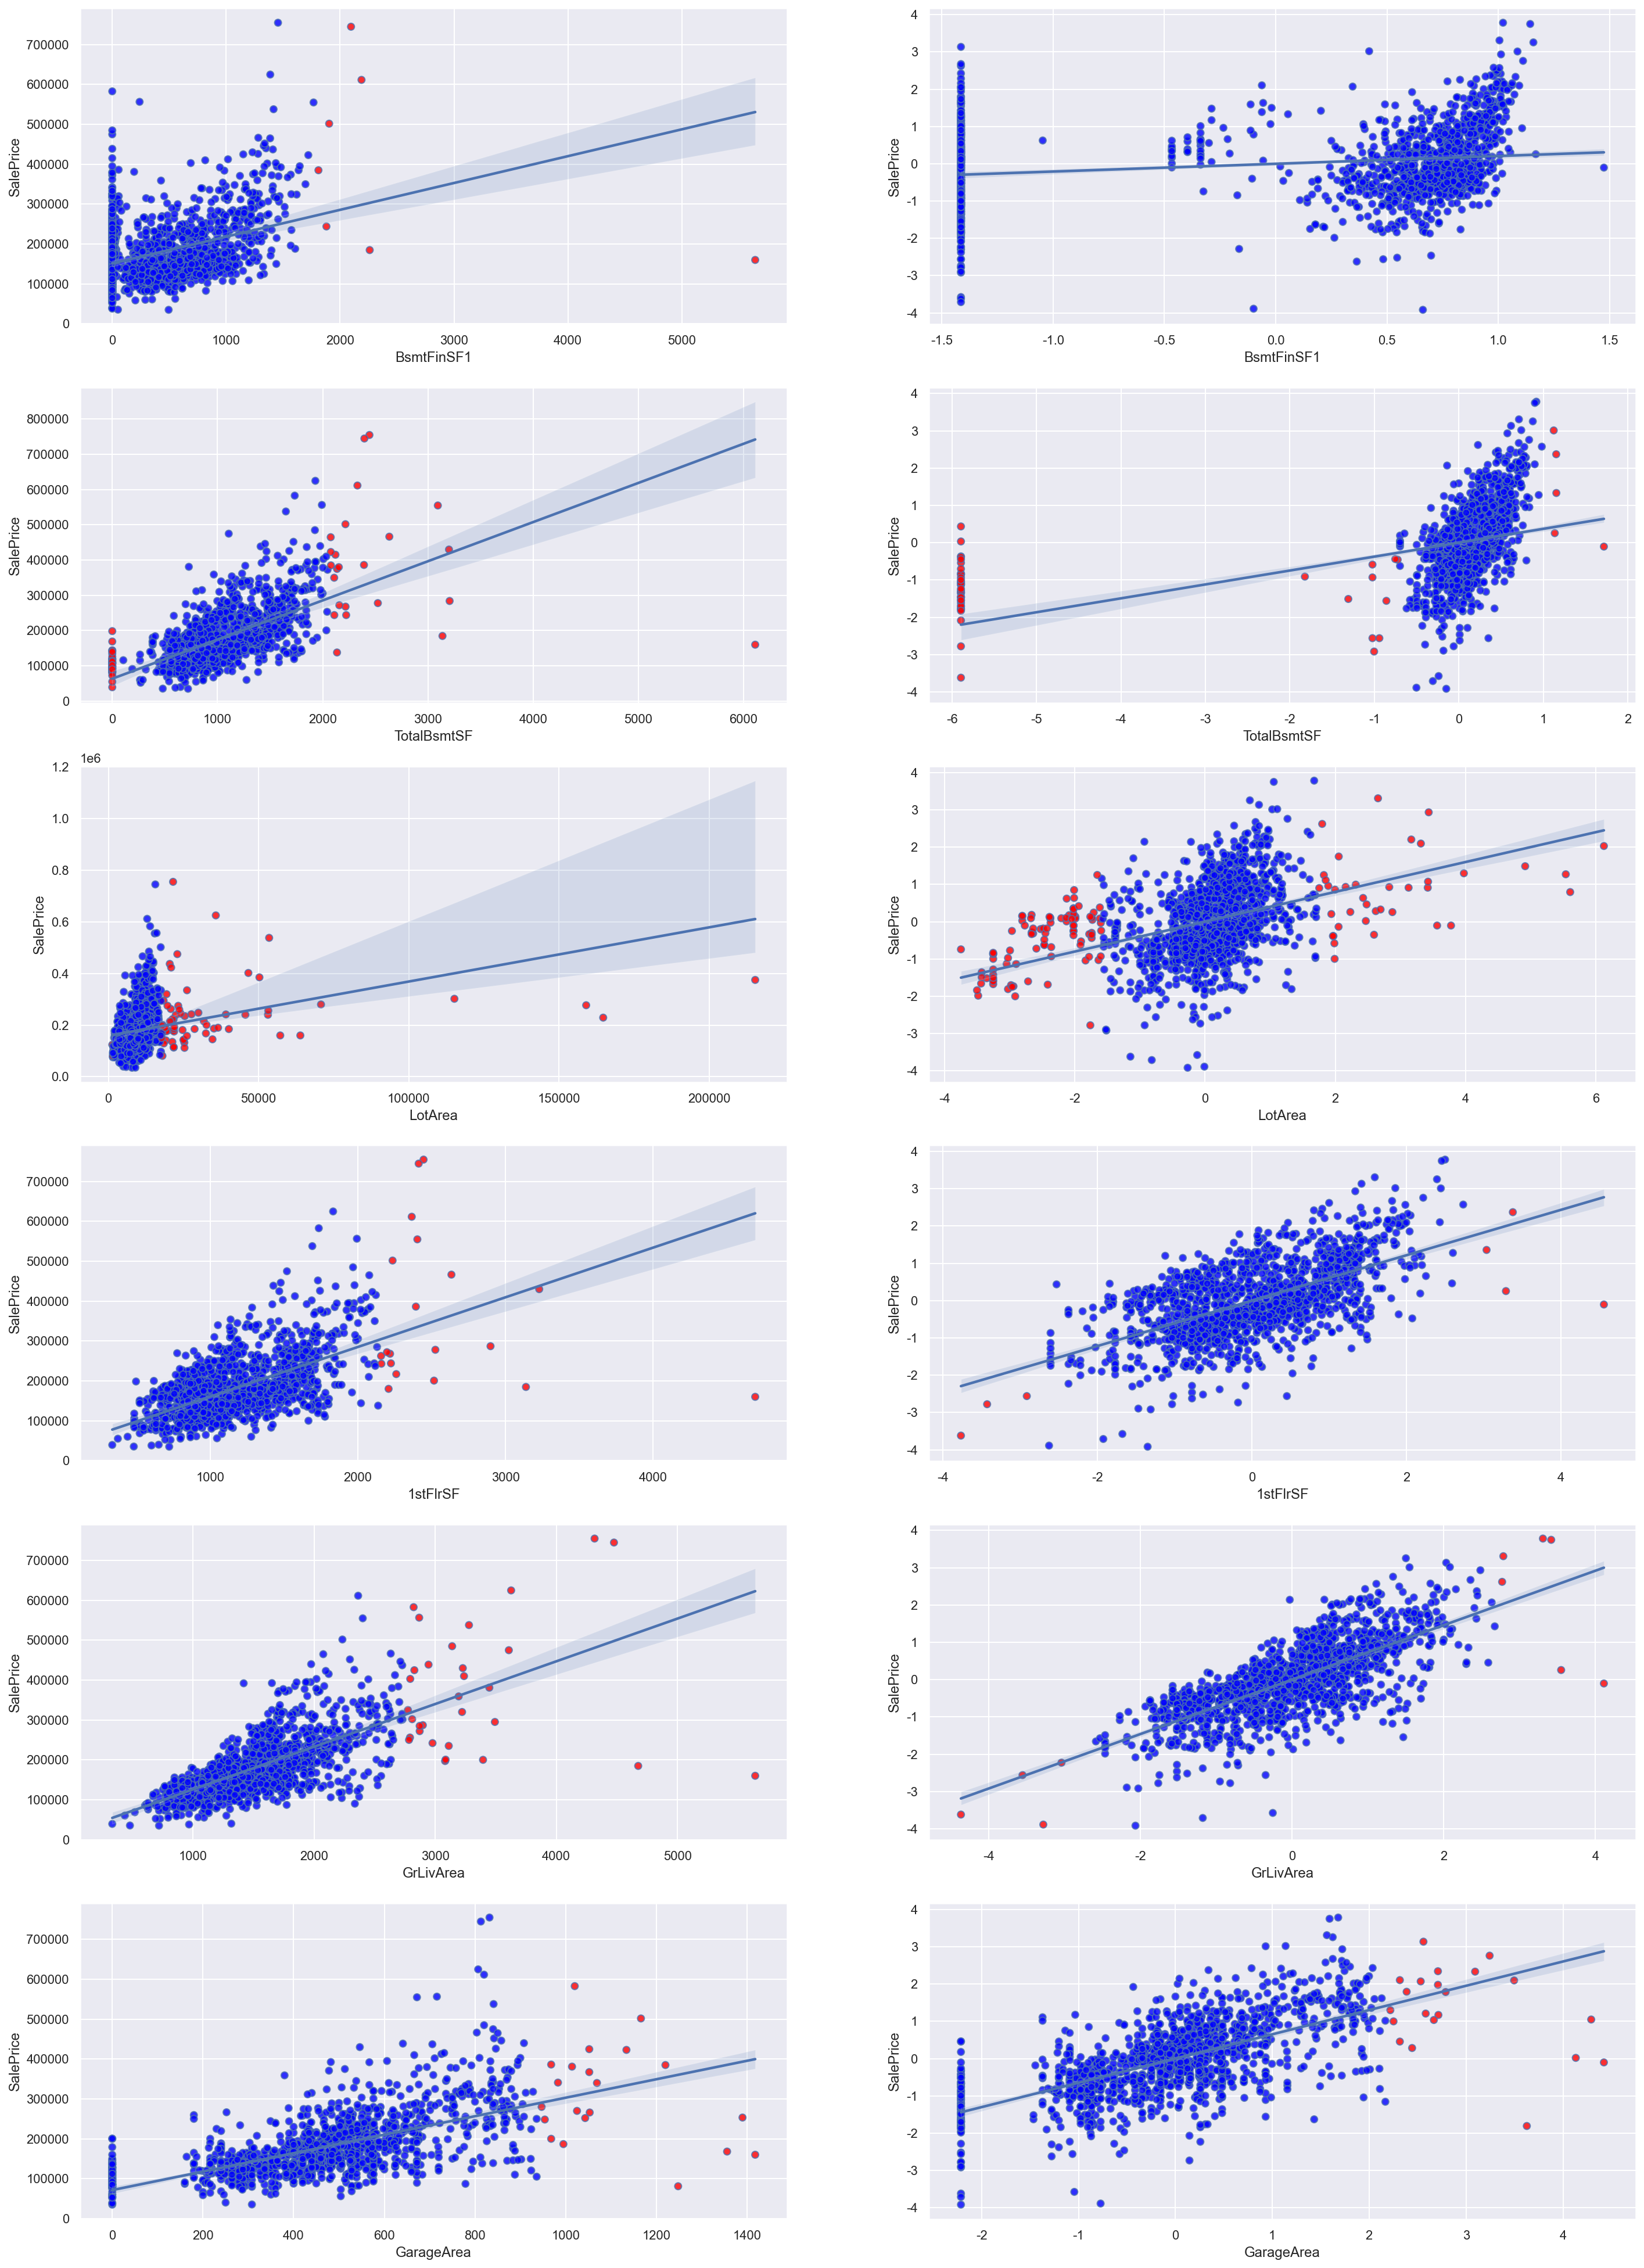

In [52]:
# 산점도를 그리는데 너무 많은 그래프를 보여주는것은 좋지 않다 판단하여 몇가지를 6개의 컬럼만 가져옴
# 왼쪽은 스케일전에서 본 이상치이고 오른쪽은 로그변환후 스탠다드 스케일까지 거친 데이터이다.
# 2개의 열, 6개의 행으로 이뤄져 있으며
# sns.regplot을 그리는데 ax =axs[행][열]로 그래프가 그려질 위치를 지정한다
# 열의 경우 위치가 고정이기에 각각 0과 1로 줬으며
# for문이 반복될 때 마다 새로운 행에 그래프를 그린다.
fig, axs =plt.subplots(figsize=(24,35), ncols = 2, nrows=6)
house_train_plt_columns = ['BsmtFinSF1', 'TotalBsmtSF', 'LotArea', '1stFlrSF', 'GrLivArea', 'GarageArea']
for i, features in enumerate(house_train_plt_columns):
  sns.regplot(x=house_train_non_scale[features], y = house_train_non_scale['SalePrice'], scatter_kws={'facecolors': house_train_non_scale[(features + '_col')]}, ax = axs[i][0])
  sns.regplot(x=scaled_ss_data[features], y = scaled_ss_data['SalePrice'], scatter_kws={'facecolors': scaled_ss_data[(features + '_col')]}, ax = axs[i][1])

## 결측치 시각화

In [53]:
# 결측치 확인 및 처리
# 총 결측치의 비율과 결측치를 가지고 있는 변수를 확인해보겠습니다.
null_df = (house_train.isna().sum() / len(house_train_outlier)) * 100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'결측값 비율' : null_df})
missing_data.head(20)

결측값 비율
PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
LotFrontage   17.739726
GarageType     5.547945
GarageYrBlt    5.547945
GarageFinish   5.547945
GarageQual     5.547945
GarageCond     5.547945
BsmtExposure   2.602740
BsmtFinType2   2.602740
BsmtFinType1   2.534247
BsmtCond       2.534247
BsmtQual       2.534247
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493

<AxesSubplot:>

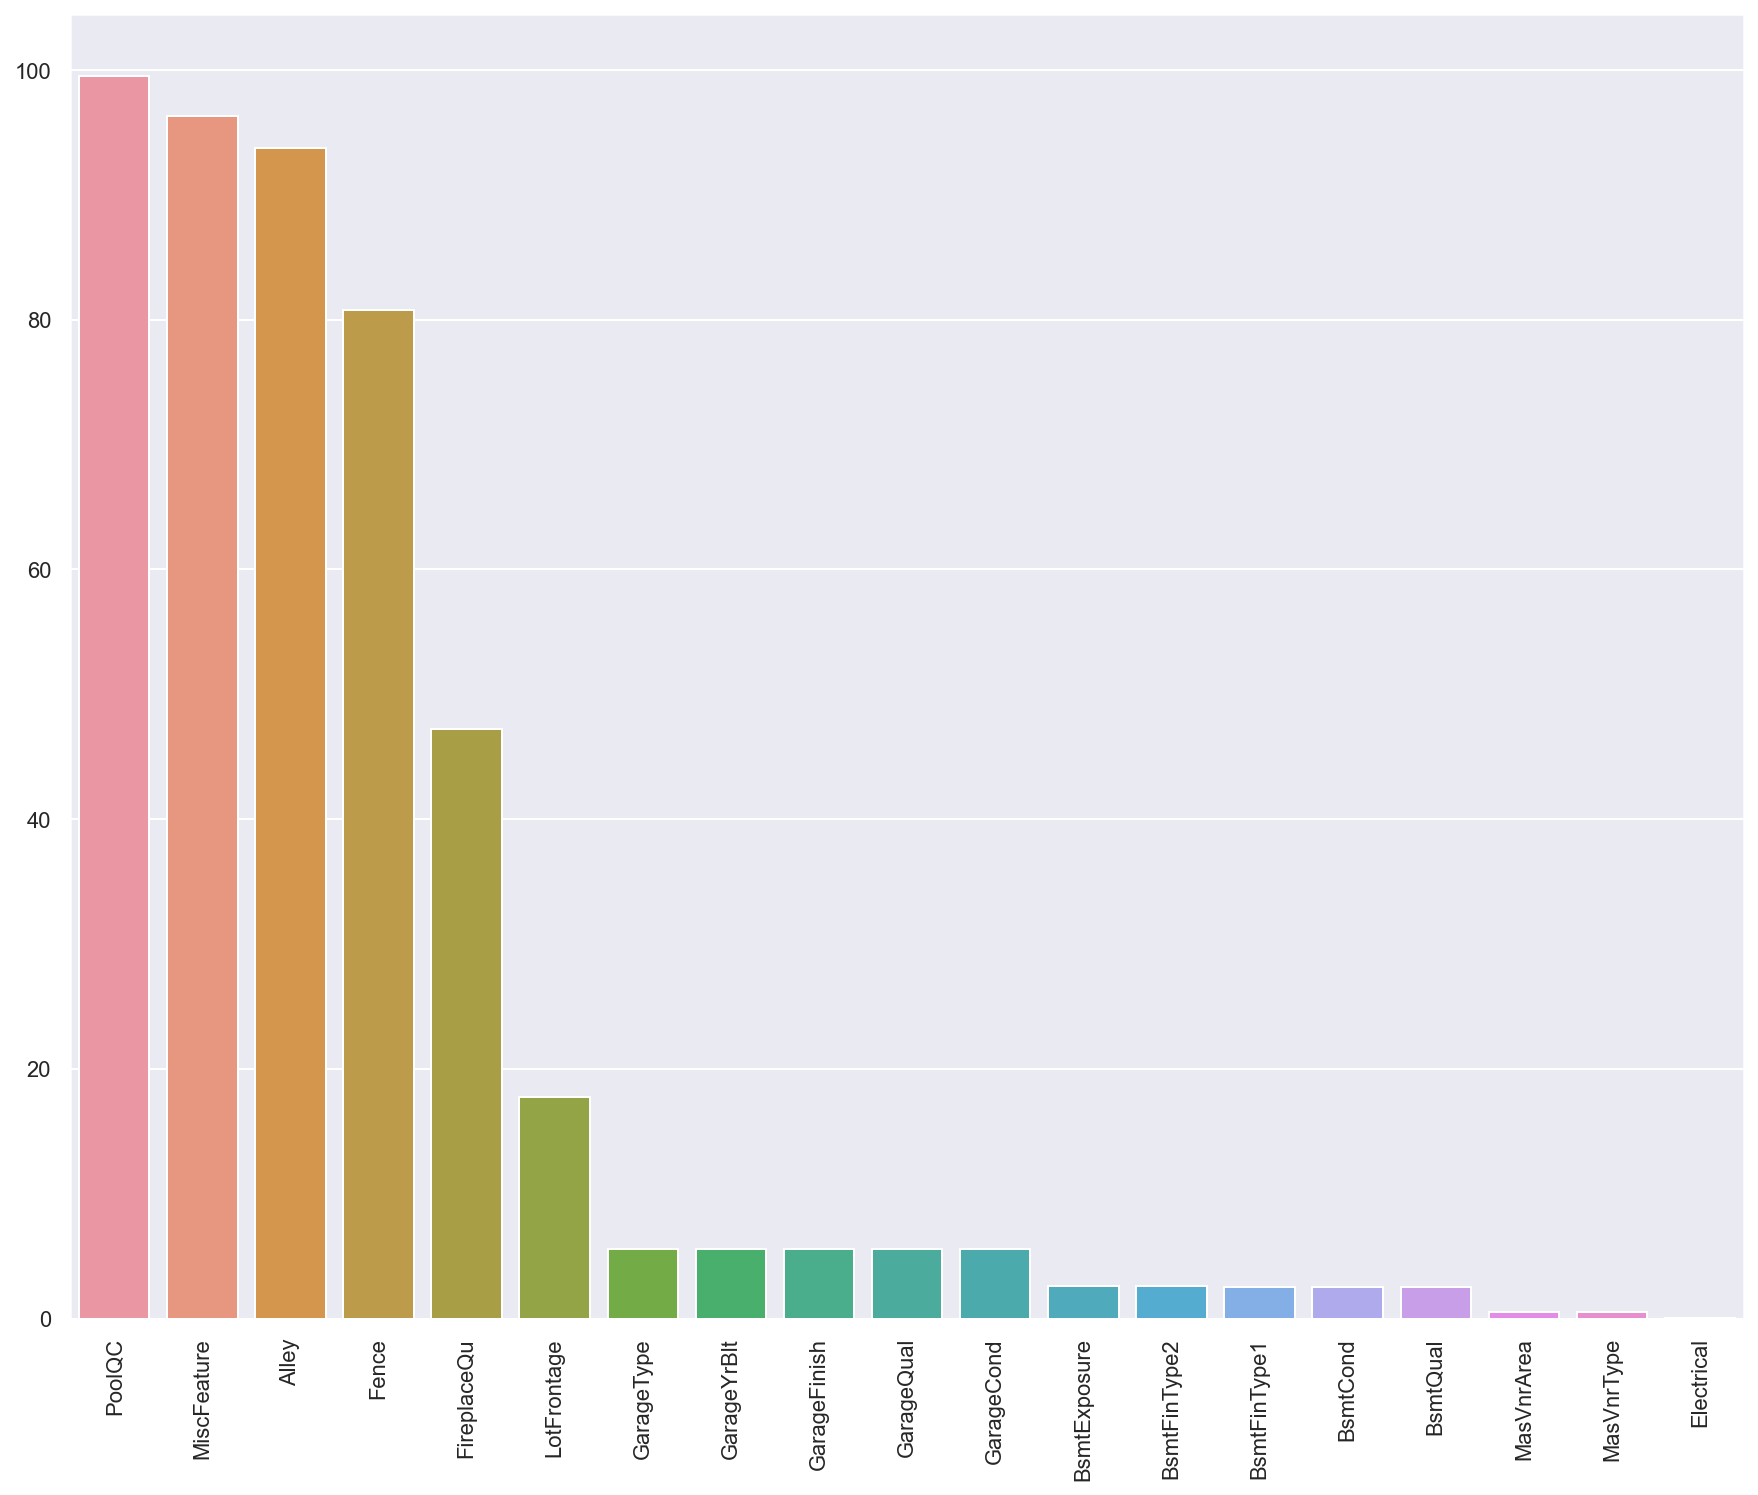

In [54]:
# 결측값의 비율을 쉽게 보기 위해 시각화를 시켜 보겠습니다.
fig, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

# 트레인 데이터 피처스케일링

## 이상치 제거

In [70]:
# 이상치를 산점도로 확인하는 함수를 변형하여 만든 함수
# max와 max를 초과한 이상치, min과 min 미만의 이상치를 해당 해당컬럼명을 포함한 새로운 변수에 담는 함수이다.
def find_outlier_max(data):
    for i in data.columns:
        if data[i].dtype != object:
#            imsi = []
#            imsi1 = []
            q1, q3 = np.percentile(data[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            # print(lower_bound)
            # print(upper_bound)
            upper_outlier_index = np.where(data[i] > upper_bound)
            lower_outlier_index = np.where(data[i] < lower_bound)
            imsi = []
            imsi1 = []
            for j in upper_outlier_index:
                imsi.append(data[i][j])
           
            
            for k in lower_outlier_index:
                imsi1.append(data[i][k])


            globals()[str(i)+'upper'] = imsi
            globals()[str(i)+'lower'] = imsi1
            globals()[str(i)+'max'] = upper_bound
            globals()[str(i)+'min'] = lower_bound

In [71]:
# 스케일된 데이터에서 이상치를 찾는다.
find_outlier_max(scaled_ss_data)

In [72]:
# LotArea의 max값
LotAreamax

1.7239756138299294

In [73]:
# LotArea를 초과하는 이상치들이다다
LotAreaupper

[53      3.314510
 171     2.427229
 185     1.798463
 197     1.996020
 249     5.540883
 271     2.828814
 313     6.126490
 335     5.608515
 384     3.420620
 411     2.595005
 417     1.753290
 451     3.975529
 457     3.424984
 523     2.877154
 529     2.481121
 588     1.971217
 661     3.167442
 692     2.052907
 706     4.916985
 769     3.435020
 828     2.230606
 848     3.125956
 876     1.985877
 934     2.158679
 939     1.892194
 943     1.963884
 1057    2.313749
 1107    1.824155
 1169    2.655972
 1184    2.621771
 1190    2.468950
 1260    1.939133
 1270    1.852052
 1287    2.695574
 1298    3.777942
 1383    1.989925
 1396    3.564172
 1446    2.050246
 Name: LotArea, dtype: float64]

In [74]:
# 원래는 이상치를 전부 제거하는 것이 맞지만 데이터의 갯수가 1460개로 얼마 되지 않아 이상치안에서 다시 이상치를 띄는 극단적인 이상치를 찾아 제거하기로 하였고
# 해당 데이터의 인덱스를 조회함
LotAreaupper[0].values
q1, q3 = np.percentile(LotAreaupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
LotAreaupper[0][LotAreaupper[0] > upper_bound].index

Int64Index([249, 313, 335], dtype='int64')

In [75]:
MiscValmax

-0.19048147368468307

In [76]:
MiscValupper

[5       5.155844
 7       4.591454
 16      5.155844
 17      4.881775
 51      4.700114
 84      5.155844
 95      4.848535
 98      4.700114
 99      4.700114
 106     4.795990
 214     4.795990
 249     4.881775
 250     4.795990
 335     5.155844
 338     4.700114
 346     7.682057
 392     5.595137
 439     5.264649
 499     4.848535
 502     4.700114
 510     6.011658
 539     6.011658
 589     5.030263
 611     4.881775
 626     5.030263
 634     5.030263
 705     6.468085
 725     4.881775
 733     4.700114
 760     4.795990
 766     4.881775
 767     5.660393
 786     5.595137
 794     4.881775
 800     4.700114
 812     3.079184
 813     4.881775
 867     4.700114
 878     4.700114
 890     6.011658
 912     5.056973
 953     4.700114
 1061    4.974067
 1076    4.881775
 1083    5.155844
 1171    5.720815
 1210    4.700114
 1230    7.172492
 1252    5.030263
 1328    5.560441
 1386    6.011658
 1457    6.193644
 Name: MiscVal, dtype: float64]

In [77]:
MiscValupper[0].values
q1, q3 = np.percentile(MiscValupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
MiscValupper[0][MiscValupper[0] > upper_bound].index

Int64Index([346, 705, 1230, 1457], dtype='int64')

In [78]:
# 스케일 후엔 이상치로 판단하지 않는 경우가 많았기에 극단적인 이상치를 가진 컬럼은 아래밖에 없었다다
# 이 컬럼명들을 outliers_c라는 변수명으로 저장장
outliers_c = ['LotFrontage', 'LotArea', 'MasVnrArea',
            'BsmtUnfSF', 'TotalBsmtSF', 'ScreenPorch',
            'MiscVal']

In [79]:
# outliers는 이상치를 제거할 때 밑의 리스트에 담겨 있는 인덱스 번호를 for문으로 꺼내올 때 사용하기 위해 만든 변수명들의 리스트이다.
outliers = ['LotFrontage_outlier_index', 'LotArea_outlier_index', 'MasVnrArea_outlier_index',
            'BsmtUnfSF_outlier_index', 'TotalBsmtSF_outlier_index', 'ScreenPorch_outlier_index',
            'MiscVal_outlier_index']

In [80]:
# 극단적인 이상치를 가진 컬럼의 인덱스를 저장
# 이후 for문으로 꺼내옴
LotFrontage_outlier_index =  [197, 231, 934, 1127, 1298]
LotArea_outlier_index = [249, 313, 335]
MasVnrArea_outlier_index = [58, 70, 115, 297, 691, 808, 1169]
BsmtUnfSF_outlier_index = [224]
TotalBsmtSF_outlier_index = [307, 490, 494, 574, 636, 703, 710, 740, 872, 1100, 1298]
ScreenPorch_outlier_index = [1328, 1386]
MiscVal_outlier_index = [346, 705, 1230, 1457]

In [81]:
# LotFrontage 컬럼의 극단적 이상치 확인
house_train['LotFrontage'][197]

69.0

In [82]:
# LotFrontage 컬럼의 중앙값
house_train['LotFrontage'].median()

69.0

In [83]:
# 이상치 제거 함수
# 이상치를 제거할 데이터명과 이상치가 존재하는 컬럼명, 그 컬럼의 인덱스가 존재하는 리스트명들을 가진 리스트를 입력한다.
# eval을 사용해야 outliers에서 j로 가져온 리스트명이 문자열 데이터가 아니라 변수명으로 작동한다.
def transform_outlier(house_train_scatter_color_numeric, outliers_c, outliers):
    for i, j in zip(outliers_c, outliers):
        a = house_train_scatter_color_numeric[i].median()
        print(j)
        for k in eval(j):
            print(k)
            house_train_scatter_color_numeric[i][k] = a

In [84]:
transform_outlier(house_train, outliers_c, outliers)

LotFrontage_outlier_index
197
231
934
1127
1298
LotArea_outlier_index
249
313
335
MasVnrArea_outlier_index
58
70
115
297
691
808
1169
BsmtUnfSF_outlier_index
224
TotalBsmtSF_outlier_index
307
490
494
574
636
703
710
740
872
1100
1298
ScreenPorch_outlier_index
1328
1386
MiscVal_outlier_index
346
705
1230
1457


In [85]:
# 이상치가 중앙값으로 대체되었는지 확인한다.
house_train['LotFrontage'][197] 

69.0

## 결측치 제거

In [86]:
# PoolQC : 결측값의 비율이 99%로 매우 높고 대부분 주택에 수영장이 없음을 감안할 때 의미있는 변수입니다.
house_train['PoolQC'] = house_train['PoolQC'].fillna('None')
# MiscFeature : 기타기능 없음을 의미합니다.
house_train['MiscFeature'] = house_train['MiscFeature'].fillna('None')
# Alley : 골목 접근 금지를 의미합니다.
house_train['Alley'] = house_train['Alley'].fillna('None')
# Fence : 울타리가 없는 것을 의미합니다.
house_train['Fence'] = house_train['Fence'].fillna('None')
# FireplaceQu : 난로가 없는 것을 의미합니다.
house_train['FireplaceQu'] = house_train['FireplaceQu'].fillna('None')

In [87]:
# LotFrontage : 주택건물에 연결된 각 거리의 면적이 주변의 다른 주택과 비슷한 지역일 가능성이 높기 때문에 
# 이웃(Neighborhood)의 LotFrontage의 중앙값으로 결측치를 채웁니다.
house_train['LotFrontage'] = house_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [88]:
# GarageType, GarageFinish, GarageQual, GarageCond : 누락된 데이터(결측치)를 None값으로 대체합니다.
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFin Type2 
# : 지하실 기능 관련데이터의 NaN(결측값)은 None으로 대체하겠습니다.
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_train[col] = house_train[col].fillna('None')

In [89]:
# GarageYrBlt, GarageArea, GarageCars : 차고가 없는 것은 결측치를 0으로 대체합니다. 
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath 
# : 지하실이 없는 것은 결측치를 0으로 대체합니다.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    house_train[col] = house_train[col].fillna(0)

In [90]:
# 이 집들에 대한 고정 베니어가 없다는 것을 의미합니다.
# MasVnrType: None을 대체합니다.
# MasVnrArea : 0을 대체합니다.
house_train['MasVnrType'] = house_train['MasVnrType'].fillna('None')
house_train['MasVnrArea'] = house_train['MasVnrArea'].fillna(0)

In [91]:
# MSZoning(The general zoning classification):'RL'이 가장 일반적인 값입니다. 따라서 'RL'로 결측값을 대체하겠습니다.
house_train['MSZoning'] = house_train['MSZoning'].fillna(house_train['MSZoning'].mode()[0])

In [92]:
# Utilities : 'NoSeWa'의 범주와 기능이 겹치므로 변수를 제거해주겠습니다.
house_train = house_train.drop(['Utilities'], axis = 1)

In [93]:
# Functional : 여기서 NA는 typical을 의미하므로 결측값을 'Typ'로 대체하겠습니다.
house_train['Functional'] = house_train['Functional'].fillna('Typ')

In [94]:
# Electrical : 여기서 NA는 'SBrkr'을 의미하므로 이것으로 대체하겠습니다.
house_train['Electrical'] = house_train['Electrical'].fillna(house_train['Electrical'].mode()[0])

In [95]:
# KitchenQual : 여기서 NA는 'TA'(가장빈번)을 의미하므로 이것으로 대체하겠습니다.
house_train['KitchenQual'] = house_train['KitchenQual'].fillna(house_train['KitchenQual'].mode()[0])

In [96]:
# Exterior1st, Exterior2nd : 통일한 결측값으로 대체하겠습니다.
house_train['Exterior1st'] = house_train['Exterior1st'].fillna(house_train['Exterior1st'].mode()[0])
house_train['Exterior2nd'] = house_train['Exterior2nd'].fillna(house_train['Exterior2nd'].mode()[0])

In [97]:
# SaleType : 가장 빈번한 데이터인 WD로 결측값 대체하겠습니다.
house_train['SaleType'] = house_train['SaleType'].fillna(house_train['SaleType'].mode()[0])

In [98]:
# MSSubClass : 여기서 Na는 건물 등급이 없다는 것을 의미하므로 None으로 결측값을 대체하겠습니다.
house_train['MSSubClass'] = house_train['MSSubClass'].fillna('None')

In [99]:
# 결측치 확인하기
null_df = (house_train.isna().sum() / len(house_train)) * 100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'결측값 비율' : null_df})
missing_data

Empty DataFrame
Columns: [결측값 비율]
Index: []

## 라벨인코딩

In [100]:
    house_train = house_train.replace({'Street' :{'Grvl':1,'Pave':2},
                      "Alley" : {"None" : 0,"Grvl" : 1, "Pave" : 2},
                      'LandContour' : {'Bnk' : 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       'SaleCondition' : {'AdjLand' : 1, 'Abnorml' : 2, 'Family' : 3, 'Alloca' : 4, 'Normal' : 5, 'Partial' : 6},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       'CentralAir' : {'N' : 0, 'Y' : 1},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## 로그변환

In [101]:
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_train.dtypes[house_train.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_train[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolQC           16.834252
PoolArea         14.813135
3SsnPorch        10.293752
LowQualFinSF      9.002080
MiscVal           8.967306
LotArea           6.187151
KitchenAbvGr      4.483784
Alley             4.284964
BsmtFinSF2        4.250888
BsmtHalfBath      4.099186
ScreenPorch       3.955462
BsmtFinType2      3.293608
EnclosedPorch     3.086696
LandContour       2.473012
OpenPorchSF       2.361912
MasVnrArea        2.099265
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
ExterCond         1.395783
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [102]:
# 왜도가 높은 컬럼명 추출 후 로그변환
house_train[skew_features_top.index] = np.log1p(house_train[skew_features_top.index])

In [103]:
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index1 = house_train.dtypes[house_train.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features1 = house_train[features_index1].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top1 = skew_features1[skew_features1 > 1]
print(skew_features_top1.sort_values(ascending=False))

PoolQC           15.711689
PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.312458
Alley             3.949996
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.179407
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
BsmtFinType2      1.861672
dtype: float64


## 원핫인코딩

In [104]:
# 문자형 컬럼 추출
house_train.dtypes[house_train.dtypes == object]

MSSubClass      object
MSZoning        object
LotConfig       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
Foundation      object
BsmtExposure    object
Heating         object
Electrical      object
GarageType      object
GarageFinish    object
Fence           object
MiscFeature     object
SaleType        object
dtype: object

In [105]:
# 원핫 인코딩을 하고 house_train_ohe에 담음
house_train_ohe = pd.get_dummies(house_train)

In [106]:
# 원핫 인코딩 확인
house_train_ohe

Id  LotFrontage   LotArea  Street  Alley  LotShape  LandContour  \
0        1         65.0  9.042040       2    0.0         4     0.693147   
1        2         80.0  9.169623       2    0.0         4     0.693147   
2        3         68.0  9.328212       2    0.0         3     0.693147   
3        4         60.0  9.164401       2    0.0         3     0.693147   
4        5         84.0  9.565284       2    0.0         3     0.693147   
...    ...          ...       ...     ...    ...       ...          ...   
1455  1456         62.0  8.976894       2    0.0         4     0.693147   
1456  1457         85.0  9.486152       2    0.0         4     0.693147   
1457  1458         66.0  9.109746       2    0.0         4     0.693147   
1458  1459         68.0  9.181735       2    0.0         4     0.693147   
1459  1460         75.0  9.204121       2    0.0         4     0.693147   

      LandSlope  OverallQual  OverallCond  ...  MiscFeature_TenC  \
0             3            7            5  ...                 0   
1             3            6            8  ...                 0   
2             3            7            5  ...                 0   
3             3            7            5  ...                 0   
4             3            8            5  ...                 0   
...         ...          ...          ...  ...               ...   
1455          3            6            5  ...                 0   
1456          3            6            6  ...                 0   
1457          3            7            9  ...                 0   
1458          3            5            6  ...                 0   
1459          3            5            6  ...                 0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1455             0             0             0               0   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   
1459             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  
1459               0               0             0             0            1  

[1460 rows x 239 columns]

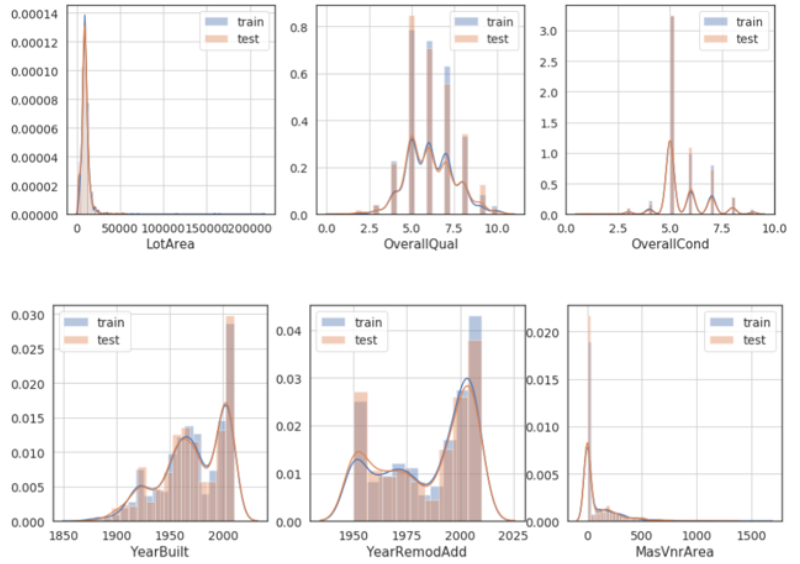

In [107]:
Image("C:/Users/admin/Desktop/1125/testtraindatasim.png") 

- Train과 Test의 분포를 확인 한 부분<br><br>
모든 변수에 대해서 비교해봤을 때, Train과 Test의 분포는 거의 동일하였다. 그래서 이 부분에서는 Train에 오버피팅(Overfitting)되는 위험은 없을 것이라 생각하고 넘어갔다.

# 테스트 데이터 피처스케일링

## 결측치 제거

In [108]:
# 똑같이 수치형이지만 범주형인 컬럼을 문자형으로 변환해 준다.
house_test['MSSubClass'] = house_test['MSSubClass'].astype(str)

In [109]:
# 결측치 확인
house_test.isna().sum()[house_test.isna().sum() >0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [110]:
# PoolQC : 결측값의 비율이 99%로 매우 높고 대부분 주택에 수영장이 없음을 감안할 때 의미있는 변수입니다.
house_test['PoolQC'] = house_test['PoolQC'].fillna('None')
# MiscFeature : 기타기능 없음을 의미합니다.
house_test['MiscFeature'] = house_test['MiscFeature'].fillna('None')
# Alley : 골목 접근 금지를 의미합니다.
house_test['Alley'] = house_test['Alley'].fillna('None')
# Fence : 울타리가 없는 것을 의미합니다.
house_test['Fence'] = house_test['Fence'].fillna('None')
# FireplaceQu : 난로가 없는 것을 의미합니다.
house_test['FireplaceQu'] = house_test['FireplaceQu'].fillna('None')

In [111]:
# LotFrontage : 주택건물에 연결된 각 거리의 면적이 주변의 다른 주택과 비슷한 지역일 가능성이 높기 때문에 
# 이웃(Neighborhood)의 LotFrontage의 중앙값으로 결측치를 채웁니다.
house_test['LotFrontage'] = house_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [112]:
# GarageType, GarageFinish, GarageQual, GarageCond : 누락된 데이터(결측치)를 None값으로 대체합니다.
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFin Type2 
# : 지하실 기능 관련데이터의 NaN(결측값)은 None으로 대체하겠습니다.
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_test[col] = house_test[col].fillna('None')

In [113]:
# GarageYrBlt, GarageArea, GarageCars : 차고가 없는 것은 결측치를 0으로 대체합니다. 
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath 
# : 지하실이 없는 것은 결측치를 0으로 대체합니다.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    house_test[col] = house_test[col].fillna(0)

In [114]:
# 이 집들에 대한 고정 베니어가 없다는 것을 의미합니다.
# MasVnrType: None을 대체합니다.
# MasVnrArea : 0을 대체합니다.
house_test['MasVnrType'] = house_test['MasVnrType'].fillna('None')
house_test['MasVnrArea'] = house_test['MasVnrArea'].fillna(0)

In [115]:
# MSZoning(The general zoning classification):'RL'이 가장 일반적인 값입니다. 따라서 'RL'로 결측값을 대체하겠습니다.
house_test['MSZoning'] = house_test['MSZoning'].fillna(house_test['MSZoning'].mode()[0])

In [116]:
# Utilities : 'NoSeWa'의 범주와 기능이 겹치므로 변수를 제거해주겠습니다.
house_test = house_test.drop(['Utilities'], axis = 1)

In [117]:
# Functional : 여기서 NA는 typical을 의미하므로 결측값을 'Typ'로 대체하겠습니다.
house_test['Functional'] = house_test['Functional'].fillna('Typ')

In [118]:
# Electrical : 여기서 NA는 'SBrkr'을 의미하므로 이것으로 대체하겠습니다.
house_test['Electrical'] = house_test['Electrical'].fillna(house_test['Electrical'].mode()[0])

In [119]:
# KitchenQual : 여기서 NA는 'TA'(가장빈번)을 의미하므로 이것으로 대체하겠습니다.
house_test['KitchenQual'] = house_test['KitchenQual'].fillna(house_test['KitchenQual'].mode()[0])

In [120]:
# Exterior1st, Exterior2nd : 통일한 결측값으로 대체하겠습니다.
house_test['Exterior1st'] = house_test['Exterior1st'].fillna(house_test['Exterior1st'].mode()[0])
house_test['Exterior2nd'] = house_test['Exterior2nd'].fillna(house_test['Exterior2nd'].mode()[0])

In [121]:
# SaleType : 가장 빈번한 데이터인 WD로 결측값 대체하겠습니다.
house_test['SaleType'] = house_test['SaleType'].fillna(house_test['SaleType'].mode()[0])

In [122]:
# MSSubClass : 여기서 Na는 건물 등급이 없다는 것을 의미하므로 None으로 결측값을 대체하겠습니다.
house_test['MSSubClass'] = house_test['MSSubClass'].fillna('None')

In [123]:
# 결측치 확인하기
null_df = (house_test.isna().sum() / len(house_test)) * 100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'결측값 비율' : null_df})
missing_data

Empty DataFrame
Columns: [결측값 비율]
Index: []

## 라벨인코딩

In [124]:
    house_test = house_test.replace({'Street' :{'Grvl':1,'Pave':2},
                      "Alley" : {"None" : 0,"Grvl" : 1, "Pave" : 2},
                      'LandContour' : {'Bnk' : 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       'SaleCondition' : {'AdjLand' : 1, 'Abnorml' : 2, 'Family' : 3, 'Alloca' : 4, 'Normal' : 5, 'Partial' : 6},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       'CentralAir' : {'N' : 0, 'Y' : 1},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## 로그변환

In [125]:
# 트레인 데이터에 로그변환한 컬럼과 같은 컬럼들만 로그 변환해준다.
house_test[skew_features_top.index[:-1]] = np.log1p(house_test[skew_features_top.index[:-1]])

## 원핫인코딩

In [126]:
# 테스트 데이터를 원핫 인코딩 하고 house_test_ohe에 담음음
house_test_ohe = pd.get_dummies(house_test)

In [127]:
# 원핫 인코딩 확인
house_train_ohe

Id  LotFrontage   LotArea  Street  Alley  LotShape  LandContour  \
0        1         65.0  9.042040       2    0.0         4     0.693147   
1        2         80.0  9.169623       2    0.0         4     0.693147   
2        3         68.0  9.328212       2    0.0         3     0.693147   
3        4         60.0  9.164401       2    0.0         3     0.693147   
4        5         84.0  9.565284       2    0.0         3     0.693147   
...    ...          ...       ...     ...    ...       ...          ...   
1455  1456         62.0  8.976894       2    0.0         4     0.693147   
1456  1457         85.0  9.486152       2    0.0         4     0.693147   
1457  1458         66.0  9.109746       2    0.0         4     0.693147   
1458  1459         68.0  9.181735       2    0.0         4     0.693147   
1459  1460         75.0  9.204121       2    0.0         4     0.693147   

      LandSlope  OverallQual  OverallCond  ...  MiscFeature_TenC  \
0             3            7            5  ...                 0   
1             3            6            8  ...                 0   
2             3            7            5  ...                 0   
3             3            7            5  ...                 0   
4             3            8            5  ...                 0   
...         ...          ...          ...  ...               ...   
1455          3            6            5  ...                 0   
1456          3            6            6  ...                 0   
1457          3            7            9  ...                 0   
1458          3            5            6  ...                 0   
1459          3            5            6  ...                 0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1455             0             0             0               0   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   
1459             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  
1459               0               0             0             0            1  

[1460 rows x 239 columns]

## 트레인 데이터와 열 맞추기

In [128]:
house_test_ohe

Id  LotFrontage   LotArea  Street  Alley  LotShape  LandContour  \
0     1461         80.0  9.360741       2    0.0         4     0.693147   
1     1462         81.0  9.565775       2    0.0         3     0.693147   
2     1463         74.0  9.534668       2    0.0         3     0.693147   
3     1464         78.0  9.208238       2    0.0         3     0.693147   
4     1465         43.0  8.518392       2    0.0         3     1.386294   
...    ...          ...       ...     ...    ...       ...          ...   
1454  2915         21.0  7.568896       2    0.0         4     0.693147   
1455  2916         21.0  7.546974       2    0.0         4     0.693147   
1456  2917        160.0  9.903538       2    0.0         4     0.693147   
1457  2918         62.0  9.253591       2    0.0         4     0.693147   
1458  2919         74.0  9.172431       2    0.0         4     0.693147   

      LandSlope  OverallQual  OverallCond  ...  MiscFeature_Shed  \
0             3            5            6  ...                 0   
1             3            6            6  ...                 0   
2             3            5            5  ...                 0   
3             3            6            6  ...                 0   
4             3            8            5  ...                 0   
...         ...          ...          ...  ...               ...   
1454          3            4            7  ...                 0   
1455          3            4            5  ...                 0   
1456          3            5            7  ...                 0   
1457          3            5            5  ...                 1   
1458          2            7            5  ...                 0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1454             0             0             0               0   
1455             0             0             0               0   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1454               0               0             0             0            1  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  

[1459 rows x 224 columns]

In [129]:
# 타겟값을 분리해 준다
house_train_ohe_target = house_train_ohe['SalePrice']
house_train_ohe_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [130]:
# 타겟값을 분리하였으니 데이터 프레임에서 타겟값을 제거한다.
house_train_ohe.drop(['SalePrice'], axis = 1, inplace = True)

In [131]:
# for문을 이용하여 train데이터엔 있지만 test데이터엔 없는 컬럼명을 추출한다.
a = []
for i in list(house_train_ohe.columns):
    if i not in house_test_ohe.columns:
        a.append(i)
a

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'MiscFeature_TenC']

In [132]:
# 위에서 추출된 컬럼들을 train데이터에서 제거해 준다.
house_train_ohe = house_train_ohe.drop(['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'MiscFeature_TenC'], axis = 1)

In [133]:
# 역으로 test데이터엔 존재하지만 train데이터에 존재하지 않는 컬럼명을 추출한다.
a = []
for i in list(house_test_ohe.columns):
    if i not in house_train_ohe.columns:
        a.append(i)
a

['MSSubClass_150']

In [134]:
# 위에서 추출된 컬럼을 test데이터에서 제거해 준다.
house_test_ohe.drop(['MSSubClass_150'], axis = 1, inplace = True)

In [135]:
house_test_ohe

Id  LotFrontage   LotArea  Street  Alley  LotShape  LandContour  \
0     1461         80.0  9.360741       2    0.0         4     0.693147   
1     1462         81.0  9.565775       2    0.0         3     0.693147   
2     1463         74.0  9.534668       2    0.0         3     0.693147   
3     1464         78.0  9.208238       2    0.0         3     0.693147   
4     1465         43.0  8.518392       2    0.0         3     1.386294   
...    ...          ...       ...     ...    ...       ...          ...   
1454  2915         21.0  7.568896       2    0.0         4     0.693147   
1455  2916         21.0  7.546974       2    0.0         4     0.693147   
1456  2917        160.0  9.903538       2    0.0         4     0.693147   
1457  2918         62.0  9.253591       2    0.0         4     0.693147   
1458  2919         74.0  9.172431       2    0.0         4     0.693147   

      LandSlope  OverallQual  OverallCond  ...  MiscFeature_Shed  \
0             3            5            6  ...                 0   
1             3            6            6  ...                 0   
2             3            5            5  ...                 0   
3             3            6            6  ...                 0   
4             3            8            5  ...                 0   
...         ...          ...          ...  ...               ...   
1454          3            4            7  ...                 0   
1455          3            4            5  ...                 0   
1456          3            5            7  ...                 0   
1457          3            5            5  ...                 1   
1458          2            7            5  ...                 0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1454             0             0             0               0   
1455             0             0             0               0   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1454               0               0             0             0            1  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  

[1459 rows x 223 columns]

In [136]:
# 열 갯수가 동일한것을 확인할 수 있다.
house_train_ohe

Id  LotFrontage   LotArea  Street  Alley  LotShape  LandContour  \
0        1         65.0  9.042040       2    0.0         4     0.693147   
1        2         80.0  9.169623       2    0.0         4     0.693147   
2        3         68.0  9.328212       2    0.0         3     0.693147   
3        4         60.0  9.164401       2    0.0         3     0.693147   
4        5         84.0  9.565284       2    0.0         3     0.693147   
...    ...          ...       ...     ...    ...       ...          ...   
1455  1456         62.0  8.976894       2    0.0         4     0.693147   
1456  1457         85.0  9.486152       2    0.0         4     0.693147   
1457  1458         66.0  9.109746       2    0.0         4     0.693147   
1458  1459         68.0  9.181735       2    0.0         4     0.693147   
1459  1460         75.0  9.204121       2    0.0         4     0.693147   

      LandSlope  OverallQual  OverallCond  ...  MiscFeature_Shed  \
0             3            7            5  ...                 0   
1             3            6            8  ...                 0   
2             3            7            5  ...                 0   
3             3            7            5  ...                 0   
4             3            8            5  ...                 0   
...         ...          ...          ...  ...               ...   
1455          3            6            5  ...                 0   
1456          3            6            6  ...                 0   
1457          3            7            9  ...                 1   
1458          3            5            6  ...                 0   
1459          3            5            6  ...                 0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1455             0             0             0               0   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   
1459             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  
1459               0               0             0             0            1  

[1460 rows x 223 columns]

In [137]:
house_train_ohe_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

# 선형 회귀 모델 학습/예측/평가

In [138]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [139]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

get_rmse(model)은 단일 모델의 RMSE 값을, get_rmse(models)는 get_rmse()를 이용해 여러 모델의 RMSE 값을 반환<br><br>
- 선형 회귀 모델을 학습하고 예측, 평가 해보겠다.

In [140]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_train_ohe_target
X_features = house_train_ohe

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=2022)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.156
Ridge 로그 변환된 RMSE: 0.129
Lasso 로그 변환된 RMSE: 0.183


[0.15609549882763105, 0.12928377116485554, 0.18273118564945495]

In [141]:
house_train_org.iloc[:,:-1]  # 타겟땐거

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...           0        0    NaN    NaN   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN    NaN   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            Lvl    AllPub  ...           0        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1457         Lvl    AllPub  ...           0        0    NaN  GdPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   
1459         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      2    2008        WD         Normal  
1            NaN       0      5    2007        WD         Normal  
2            NaN       0      9    2008        WD         Normal  
3            NaN       0      2    2006        WD        Abnorml  
4            NaN       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1455         NaN       0      8    2007        WD         Normal  
1456         NaN       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458         NaN       0      4    2010        WD         Normal  
1459         NaN       0      6    2008        WD         Normal  

[1460 rows x 80 columns]

In [142]:
# model = sm.OLS(house_train_org.iloc[:,-1].values, house_train_org.iloc[:,:-1])

In [143]:
# re = model.fit()

In [144]:
# # 모델의 설명력이 1로 매우 높지만 변수들 중 P-value가 높은 값들이 존재하며 다중공산성의 문제가 있을 수도 있습니다.
# re.summary()

In [145]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif['Features'] = house_train.columns
# vif['vif'] = [variance_inflation_factor(house_train.values, i) for i in range(house_train.shape[1])]

앞에서 설명한대로 다중공산성 존재는 data description을 참고하며 변수들을 정리하였기 때문에 <br><br> 넘어가도록 한다.
<br><br><br>
- 해결방안으로, 관측값을 늘려 표본의 크기를 증가한다.
* robust : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [146]:
# 주어진 데이터로 인해 표본의 크기를 증가 할 수 없기 때문에 robust 한 트리모델을 사용하기로 결정
# 데이터에 RoubustScaler화 시키기
from sklearn.preprocessing import RobustScaler
rbst_scaler = RobustScaler()
X_rbst = rbst_scaler.fit_transform(house_train_ohe)
test_rbst = rbst_scaler.transform(house_test_ohe)

## 교차검증 KFold

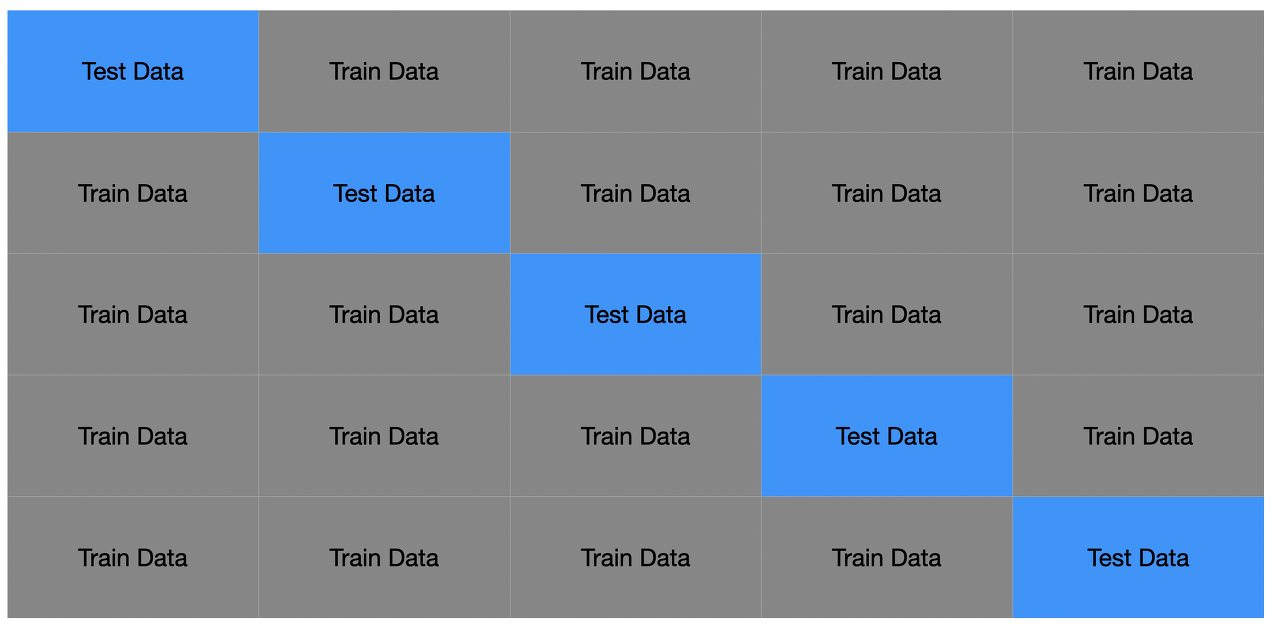

In [157]:
Image("C:/Users/admin/Desktop/1125/cv1.png") 

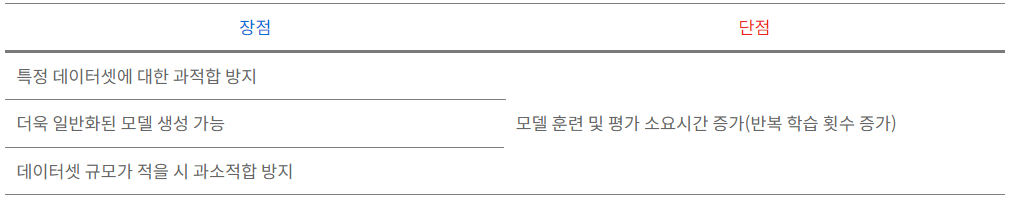

In [156]:
Image("C:/Users/admin/Desktop/1125/cv2.png") 

In [147]:
kfold = KFold(n_splits = 4)

In [148]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state = random_state))
reg.append(GradientBoostingRegressor(random_state = random_state))
reg.append(XGBRegressor(silent = True, random_state = random_state))
reg.append(LGBMRegressor(verbose_eval = False, random_state = random_state))

In [149]:
reg_results = []

for regre in reg:
    reg_results.append(np.mean(np.sqrt(-cross_val_score(
        regre, X_rbst, y = house_train_ohe_target, scoring = 'neg_mean_squared_error', cv = kfold, n_jobs = -4))))

In [150]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [151]:
reg_re = pd.DataFrame({'CrossValMeans' : reg_means, 'CrossValerrors' : reg_std})
reg_re

CrossValMeans  CrossValerrors
0       0.387013             0.0
1       0.378090             0.0
2       0.144581             0.0
3       0.126089             0.0
4       0.140093             0.0
5       0.131317             0.0

##  파라미터 튜닝 & 그리드 서치

- CrossValMeans 확인 결과 Gradient boosting, xgboost, lightgbm 모델에 대해 파라미터 튜닝

##  Gradient boosting 파라미터 튜닝

In [152]:
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100, 200, 300],
                'learning_rate' : [0.1, 0.05, 0.01],
                'max_depth' : [4, 8],
                'min_samples_leaf' : [100, 150],
                'max_features' : [0.3, 0.1]}
gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv = kfold, scoring = 'neg_mean_squared_error',
                    n_jobs = 4, verbose = 1)
gsGBC.fit(X_rbst, house_train_ohe_target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


-0.01913431604661976

## XGBoost 파라미터 튜닝

In [153]:
XGB = XGBRegressor()
xgb_param_grid = {'learning_rate' : [1, 0.1, 0.01, 0.001],
                  'n_estimators' : [50, 100, 200, 500, 1000],
                  'max_depth' : [1, 3, 5, 10 ,50]}
gsXGB = GridSearchCV(XGB, param_grid = xgb_param_grid, 
                     cv = kfold, scoring = 'neg_mean_squared_error', n_jobs = 4, verbose = 1)
gsXGB.fit(X_rbst, house_train_ohe_target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


-0.01595322058001101

## LGBMClassifier 파라미터 튜닝

In [158]:
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1, 5, 10],
    'learning_rate' : [1, 0.1, 0.01, 0.001],
    'n_estimators' : [50, 100, 200, 500, 1000, 5000],
    'max_depth' : [15, 20, 25],
    'num_leaves' : [50, 100, 200],
    'min_split_gain' : [0.3, 0.4]
}
gsLGB = GridSearchCV(LGB, param_grid = lgb_param_grid, cv = kfold, scoring = 'neg_mean_squared_error',
                    n_jobs = 4, verbose = 1)
gsLGB.fit(X_rbst, house_train_ohe_target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_


Fitting 4 folds for each of 432 candidates, totalling 1728 fits


-0.020552351982487723

# 예측

## 앙상블

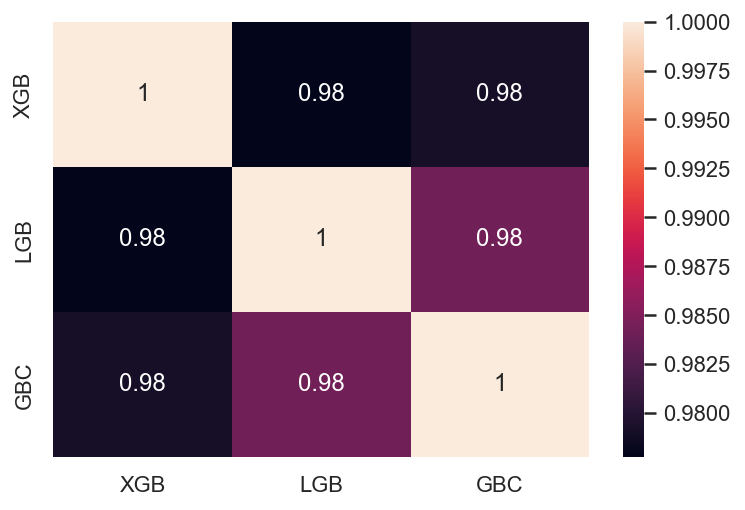

In [159]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name = 'GBC')
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name = 'XGB')
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name = 'LGB')

ensemble_results = pd.concat([test_Survived_XGB, test_Survived_LGB, test_Survived_GBC], axis = 1)
g = sns.heatmap(ensemble_results.corr(), annot = True)

In [160]:
ensemble = np.expm1(0.1 * test_Survived_GBC + 0.8 * test_Survived_XGB + 0.1 * test_Survived_LGB)
submission = pd.DataFrame({'Id' :house_test['Id'],
                          'SalePrice' : ensemble})
submission.head()

Id      SalePrice
0  1461  122423.066764
1  1462  160753.662135
2  1463  188803.560103
3  1464  195784.806800
4  1465  191894.357403

## 보팅

In [161]:
from sklearn.ensemble import VotingRegressor
votingC = VotingRegressor(estimators=[('XGB', XGB_best), ('LGB', LGB_best), ('GBC',GBC_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, house_train_ohe_target)  

In [162]:
test_SalePrice = pd.Series(votingC.predict(test_rbst), name="SalePrice")
submission = pd.DataFrame({
    "Id" :house_test['Id'],
    "SalePrice": np.expm1(test_SalePrice)
})
submission.head()

Id      SalePrice
0  1461  122176.571191
1  1462  161296.433043
2  1463  186639.974639
3  1464  192415.690531
4  1465  189613.827939

## 스태킹

In [163]:
# pip install mlxtend

In [164]:
params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'use_features_in_secondary' : [True, False]}

In [165]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = GBC_best

lr = LogisticRegression()
st_re= StackingRegressor(regressors=[clf1, clf2, clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(X_rbst, house_train_ohe_target)
st_pred = st_mod.predict(test_rbst)

In [166]:
submission = pd.DataFrame({
    "Id" :house_test['Id'],
    "SalePrice": np.expm1(st_pred)
})
submission.head()

Id      SalePrice
0  1461  121561.263383
1  1462  164238.880522
2  1463  186316.424796
3  1464  193576.137031
4  1465  189373.929963

## 블랜딩

In [167]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=house_train_ohe):
    rmse = np.sqrt(-cross_val_score(model, X_rbst, house_train_ohe_target,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [168]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_enect = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
enect_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [169]:
ridge = make_pipeline(RidgeCV(alphas=alphas_ridge, cv=kfolds))

In [170]:
lasso = make_pipeline(LassoCV(alphas=alphas_lasso,
                              random_state=2, cv=kfolds))

In [171]:
enet = make_pipeline(ElasticNetCV(alphas=alphas_enect,
                                        cv=kfolds, l1_ratio=enect_l1ratio))

In [172]:
svr = make_pipeline(SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [173]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, enet,
                                            GBC_best, XGB_best, LGB_best),
                                meta_regressor=XGB_best,
                                use_features_in_secondary=True)

In [ ]:
# stack_gen = StackingCVRegressor(regressors=(ridge, enet,
#                                             GBC_best, XGB_best, LGB_best),
#                                 meta_regressor=XGB_best,
#                                 use_features_in_secondary=True)

In [174]:
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(GBC_best)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(XGB_best)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(LGB_best)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Kernel Ridge score: 0.1239 (0.0245)

Lasso score: 0.1233 (0.0254)

ElasticNet score: 0.1231 (0.0254)

SVR score: 0.1225 (0.0269)

Lightgbm score: 0.1333 (0.0176)

GradientBoosting score: 0.1222 (0.0215)

Xgboost score: 0.1420 (0.0229)



In [175]:
stack_gen_model = stack_gen.fit(np.array(X_rbst), np.array(house_train_ohe_target))
elastic_model_full_data = enet.fit(X_rbst, house_train_ohe_target)
lasso_model_full_data = lasso.fit(X_rbst, house_train_ohe_target)
ridge_model_full_data = ridge.fit(X_rbst, house_train_ohe_target)
svr_model_full_data = svr.fit(X_rbst, house_train_ohe_target)
gbr_model_full_data = GBC_best.fit(X_rbst, house_train_ohe_target)
xgb_model_full_data = XGB_best.fit(X_rbst, house_train_ohe_target)
lgb_model_full_data = LGB_best.fit(X_rbst, house_train_ohe_target)

In [176]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [177]:
pred = np.floor(np.expm1(blend_models_predict(test_rbst)))
submission = pd.DataFrame({
    "Id" :house_test['Id'],
    "SalePrice": pred
})
submission.head()

Id  SalePrice
0  1461   118724.0
1  1462   158774.0
2  1463   187024.0
3  1464   194812.0
4  1465   190929.0

In [178]:
print(test_rbst)

[[ 1.0013708   0.5         0.47676145 ...  0.          0.
   0.        ]
 [ 1.0027416   0.55        0.95590843 ...  0.          0.
   0.        ]
 [ 1.00411241  0.2         0.88321422 ...  0.          0.
   0.        ]
 ...
 [ 2.9972584   4.5         1.7452342  ...  0.          0.
   0.        ]
 [ 2.9986292  -0.4         0.22636083 ...  0.          0.
   0.        ]
 [ 3.          0.2         0.03669481 ...  0.          0.
   0.        ]]


In [179]:
blend_models_predict(test_rbst)


array([11.68456819, 11.97524678, 12.13900003, ..., 11.98570161,
       11.62066777, 12.27811256])

In [180]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [181]:
elastic_model_full_data = enet.fit(X_rbst, house_train_ohe_target)

In [182]:
elastic_model_full_data.predict(test_rbst)

array([11.64753122, 11.97650774, 12.10631147, ..., 12.02667557,
       11.66906609, 12.31516454])

In [183]:
lasso_model_full_data.predict(test_rbst)

array([11.64707654, 11.97661409, 12.10685518, ..., 12.02674943,
       11.6701773 , 12.31671962])

In [184]:
ridge_model_full_data.predict(test_rbst)

array([11.64379879, 11.98247109, 12.09774069, ..., 12.02649564,
       11.65518706, 12.30157227])

In [185]:
svr_model_full_data.predict(test_rbst)

array([11.67320574, 12.00104876, 12.15588204, ..., 12.03624261,
       11.75435371, 12.32713235])

In [186]:
gbr_model_full_data.predict(test_rbst)

array([11.72138131, 11.99346233, 12.15152175, ..., 12.06785408,
       11.64081808, 12.25632864])

In [187]:
xgb_model_full_data.predict(test_rbst)

array([11.713395, 11.985395, 12.153102, ..., 11.891494, 11.571796,
       12.255717], dtype=float32)

In [188]:
lgb_model_full_data.predict(test_rbst)

array([11.72101919, 11.96383234, 12.10883589, ..., 11.96765003,
       11.67087815, 12.32601721])

In [190]:
from catboost import CatBoostRegressor

In [191]:
model_CBR = CatBoostRegressor()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
catboost_full_data = grid.fit(X_rbst, house_train_ohe_target)

0:	learn: 0.3728723	total: 141ms	remaining: 13.9s
1:	learn: 0.3518745	total: 147ms	remaining: 7.18s
2:	learn: 0.3310948	total: 152ms	remaining: 4.92s
3:	learn: 0.3099922	total: 157ms	remaining: 3.77s
4:	learn: 0.2917967	total: 162ms	remaining: 3.08s
5:	learn: 0.2748101	total: 167ms	remaining: 2.62s
6:	learn: 0.2613136	total: 172ms	remaining: 2.29s
7:	learn: 0.2484517	total: 177ms	remaining: 2.04s
8:	learn: 0.2364782	total: 183ms	remaining: 1.85s
9:	learn: 0.2261357	total: 188ms	remaining: 1.69s
10:	learn: 0.2164193	total: 193ms	remaining: 1.56s
11:	learn: 0.2082689	total: 198ms	remaining: 1.46s
12:	learn: 0.2001730	total: 204ms	remaining: 1.36s
13:	learn: 0.1934197	total: 209ms	remaining: 1.28s
14:	learn: 0.1872335	total: 214ms	remaining: 1.21s
15:	learn: 0.1814044	total: 219ms	remaining: 1.15s
16:	learn: 0.1758693	total: 224ms	remaining: 1.09s
17:	learn: 0.1711957	total: 229ms	remaining: 1.04s
18:	learn: 0.1667277	total: 234ms	remaining: 997ms
19:	learn: 0.1634680	total: 239ms	remaini

In [192]:
catboost_full_data.predict(test_rbst)

array([11.68516494, 11.94326005, 12.09916569, ..., 12.04490686,
       11.64488842, 12.30641917])

In [193]:
def blend_models_predict1(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.10 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.15 * stack_gen_model.predict(np.array(X)) + \
            (0.15 * catboost_full_data.predict(np.array(X))
            )))

In [194]:
blend_models_predict1(test_rbst)

array([11.68281012, 11.97224855, 12.12889176, ..., 12.00313863,
       11.6372712 , 12.28910496])

In [195]:
pred = np.floor(np.expm1(blend_models_predict1(test_rbst)))
submission = pd.DataFrame({
    "Id" :house_test['Id'],
    "SalePrice": pred
})
submission.head()

Id  SalePrice
0  1461   118515.0
1  1462   158299.0
2  1463   185143.0
3  1464   194537.0
4  1465   191636.0

In [196]:
submission.to_csv('Chimera.csv', index=False)

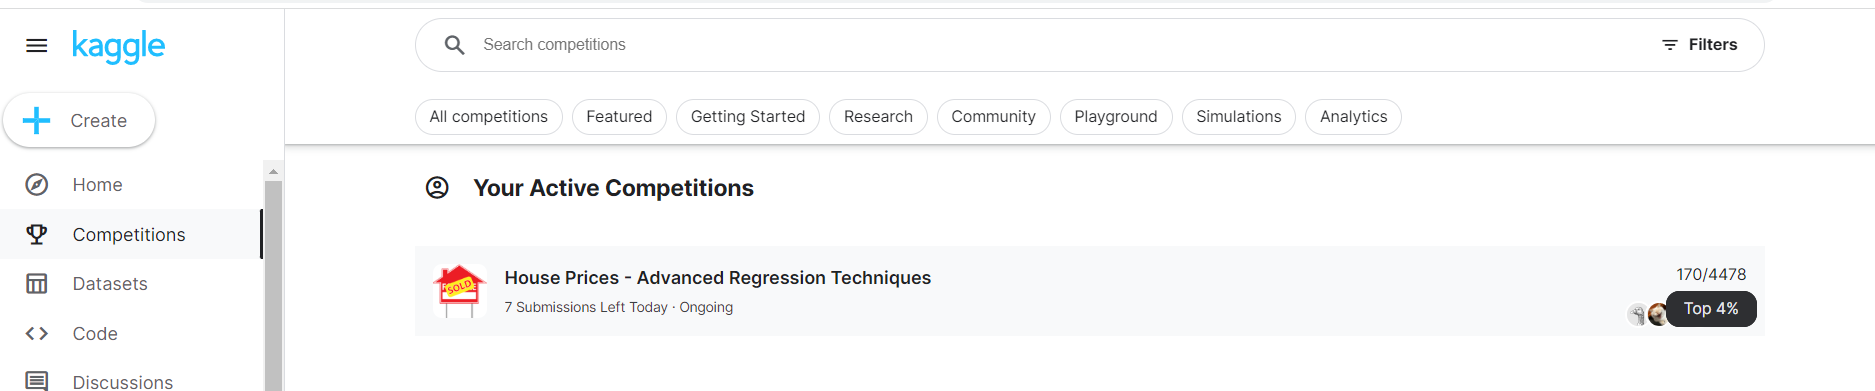

In [197]:
Image("C:/Users/admin/Desktop/1125/4percent.png") 

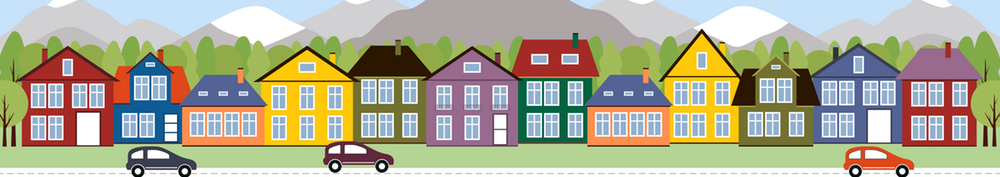

In [189]:
Image("C:/Users/admin/Desktop/1125/housesbanner.png") 